# Customer Churning Prediction using Python


#### Coding by: Julika Pradhan

#### Date: 16th May, 2024

### Data File Information

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

The data set includes information about:

1. Customers who left within the last month – Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and streaming movies
3. Customer account information – how long they’ve been a customer (tenure), contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age (senior citizen or not), and if they have partners and dependents

### Goal

1. Data Analytics to understand the patterns.

2. Predict Churning.

3. Provide an evaluation of how the model performs.

4. Segment the customers to understand similar behaviour.

5. Identify churn drivers

### Deliverables

1. The code has enough comments and headlines to describe its importance
2. This code holds a summary of methods utilised at the last, but it does not have any summary of insights. Two presentations are prepared separately mentioning all the insights, assumptions, recommendations and summarisation to presenting Technical and Business stakeholders

### Data Analytics

1. Overall data properties
2. Descriptive Statistics
3. Understand individual categories in each feature
4. Uni-variate analysis (Individual feature behaviour)
5. Bi-variate analysis (Individual relationship with Churn attribue and relationship between independent attributes)
6. Multi-variate analysis (Correlation analysis)
7. Statistical Analysis: Hypothesis Testing
7. Customer Segmentation analysis

### Tools used

**Data Visulations** 

1. Matplotlib, 
2. Seaborn

**Model Building**

1. skleran
2. imblearn
3. xgboost

**Data Manipulations and analysis**

1. pandas
2. numpy
3. Scipy


### Plottings

1. Boxplot
2. Barplot
3. Histplot
4. Distplot
5. Countplot
6. Scatter plot
7. Heat map

### Data Transformations

1. Removed unwanted features
2. Removed null values
3. Corrected data types
4. Created new feature
5. Binary encoding
6. One-Hot encoding
7. Data scaling
8. Sampling (optional)

### Model Building

1. **Tree Model**: Decision Tree (Basic model, Hyperparameter tuning: GridSearchCV)
2. **Extreme Gradient Boosting**: XGBoost (Basic, Hyperparameter tuning: RandomizedSearchCV, GridSearchCV, Recursive Feature Eliminations(RFE))
3. **Tree based Ensemble Model**: Balanced Random Forest (Basic,Hyperparameter tuning :RandomizedSearchCV with Stratified CV, RFE)
4. **Linear Model**: Logistic Regression (Basic, Hyperparameters: GridSearchCV with RepeatedStratified CV)
5. **Stacking Ensemble Models** (Stacked all 4 above)
6. **Clustering**:K-Means to segment the cutsomers

### Performance Metrics (Success Criteria)

1. Metrics utilised: Recall, Precision, F1-Score, Accuracy
2. Most important metrics to consider: **Recall of Predicted class** (The percentage of data samples that a machine learning model correctly identifies as belonging to a class of interest—the “positive class”—out of the total samples for that class)
3. A minimum of 75% churned customers should be predicted
4. Human evaluation on feature importances derived by Models with comparing to information extracted from the analysis

### Future work

1. Make the code automated by creating functions, this code is only for analysis purpose
2. Make more Hyper-parameter tuning in future to balance the metrics and improve them if required

***To get the desired output, each cell of the Jupyter Notebook should be run one by one without missing anyhting***

### Import Libraries

In [1]:
# EDA
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tkinter
plt.style.use('fivethirtyeight')
import scipy.stats as stats
from scipy.stats import f
import scipy
import warnings
warnings.filterwarnings('ignore')
import jupyter_core

# Model Building
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, KFold
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV
import imblearn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

#Data processing
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import itertools
from itertools import product
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from scipy.stats import zscore

**Versions**

In [2]:
print("Pandas:",pd.__version__)
print("Numpy:",np.__version__)
print("SeaBorn:",sns.__version__)
print("Matplotlib:",matplotlib.__version__)
print("Xgboost:",xgb.__version__)
print("Sklearn:",sklearn.__version__)
print("imblearn:",imblearn.__version__)
print("scipy:",scipy.__version__)
print("Jupyter Notebbok:",jupyter_core.__version__)

Pandas: 1.2.4
Numpy: 1.22.0
SeaBorn: 0.11.1
Matplotlib: 3.6.0
Xgboost: 2.0.1
Sklearn: 1.2.2
imblearn: 0.12.2
scipy: 1.10.1
Jupyter Notebbok: 4.7.1


# Load the data set

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
#Check data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
#Shape of the data, first is raws and 2nd is columns
df.shape

(7043, 21)

In [7]:
#Overall information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check Null values

In [8]:
#Totak null value in each column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check Duplicate Data

In [9]:
#Sum of duplicate data
df.duplicated().sum()

0

### Check Values and Data Type Consistency

In [10]:
'''Checking each column"s unique values, no of unique values and respective data type to understand whether
datatype is correctly assigned with respect the values or not and also to check value discrepancies'''

for col in df.columns:
    if col != "customerID": #We dont need this,we are checking only the required columns
        print(col,":","values = ",df[col].unique(),",","Total Unique Value count:",
              df[col].nunique(),",","DataType = ", df[col].dtype)

gender : values =  ['Female' 'Male'] , Total Unique Value count: 2 , DataType =  object
SeniorCitizen : values =  [0 1] , Total Unique Value count: 2 , DataType =  int64
Partner : values =  ['Yes' 'No'] , Total Unique Value count: 2 , DataType =  object
Dependents : values =  ['No' 'Yes'] , Total Unique Value count: 2 , DataType =  object
tenure : values =  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] , Total Unique Value count: 73 , DataType =  int64
PhoneService : values =  ['No' 'Yes'] , Total Unique Value count: 2 , DataType =  object
MultipleLines : values =  ['No phone service' 'No' 'Yes'] , Total Unique Value count: 3 , DataType =  object
InternetService : values =  ['DSL' 'Fiber optic' 'No'] , Total Unique Value count: 3 , DataType =  object
OnlineSecurity : values =  ['No' 'Yes' 'No internet service']

### Analysis to-do as per above output

1. Coulmn **"Total Charges"** has floating values but data type is "Object". Need to check "Why" and change the type to float
2. Column **"MultipleLines"** has values as "No", "No Phone Service" and "yes". Investigate if  "No" and "No Phone Service" has same meaning or different.
3. Column **"InternetService"** has values as 'DSL' 'Fiber optic' 'No'. Need to understand, what is this "No"
4. Column **"OnlineSecurity"** has values as 'No' 'Yes' 'No internet service'. Investigate if  "No" and "No internet service" has same meaning or different.
5. Column **"OnlineBackup"** has values as 'No' 'Yes' 'No internet service'. Investigate if  "No" and "No internet service" has same meaning or different.
6. Column **"DeviceProtection"** has values as 'No' 'Yes' 'No internet service'. Investigate if  "No" and "No internet service" has same meaning or different.
7. Column **"TechSupport"** has values as 'No' 'Yes' 'No internet service'. Investigate if  "No" and "No internet service" has same meaning or different.
8. Column **"StreamingTV"** has values as 'No' 'Yes' 'No internet service'. Investigate if  "No" and "No internet service" has same meaning or different.
9. Column **"StreamingMovies"** has values as 'No' 'Yes' 'No internet service'. Investigate if  "No" and "No internet service" has same meaning or different.

### Data Analysis on above described attributes

**customerID**

In [11]:
# Drop Customer Id, we dont need it. Its a noise with No usefullness towards model building

df.drop(["customerID"],axis=1,inplace=True)

**TotalCharges**

#df["TotalCharges"] = df["TotalCharges"].astype("float64")

While converting to float using above code, it gave the error as "ValueError: could not convert string to float:"

Which means in the data, there is also presence of string value or blank value or nan values which need to remove or correct

In [12]:
# First checking if any value with blank data, as this is a common issue. 

df[df["TotalCharges"] == " "].shape

(11, 20)

In [13]:
(11/7043) * 100 # Checking missing percentage

0.1561834445548772

In [14]:
#df[df["TotalCharges"] == " "] #Check the data with blank Total Charges

11 data with blank record, these are missing values but having a space, and therefore the column might have assigned with "object datatype". 11 is a very less missing count which is < 2% of the data, therefore I am not doing any imputation here instead I will remove them.

In [15]:
df = df[df["TotalCharges"] != " "] # Removing those values

#df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

In [16]:
df["TotalCharges"] = df["TotalCharges"].astype("float64") # Again trying to convert them

In [17]:
# Now conversion is successful which means values are corrected and there is no more string present
df["TotalCharges"].dtype

dtype('float64')

**MultipleLines**


In [18]:
df["MultipleLines"].unique()

#Unique values

array(['No phone service', 'No', 'Yes'], dtype=object)

In [19]:
df[df["PhoneService"] == "Yes"] ["MultipleLines"].value_counts()

#Checking if customer has taken phone service, what are the values for Multiplelines

No     3385
Yes    2967
Name: MultipleLines, dtype: int64

In [20]:
df[df["PhoneService"] == "No"] ["MultipleLines"].value_counts()

#Checking if customer has not taken the phone service, what are the values for Multiplelines

No phone service    680
Name: MultipleLines, dtype: int64

In [21]:
df[df["PhoneService"] == "No"].shape 

# Checking if Not phone service == No phone service in Multiline

(680, 20)

**Result**

Multipline simply means where two or more call can happen, so this field is dependent on Phone Service.

1. A customer has taken phone service, and he has not taken multi-line service, so the value will be NO.
2. A customer has taken phone service, and he has also taken multi-line service, so the value will be YES.
3. A customer has not taken any phone service, so the value of mult-line will be "No phone service"

As per the above criteria which is also proved in the coding, **[ "No", "No phone service"] are two different field therefore all the values are correct, no cleaning required**

**InternetService**

In [22]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

DSL: Digital Subscriber Line a modem technology that uses existing telephone lines to transport high-bandwidth data, such as multimedia and video, to service subscribers

Fiber optic: A data connection carried by a cable filled with thin glass or plastic fibers

No: Asumption is saying, the customer has not taken any internet service

**OnlineSecurity**

In [23]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
df[df["InternetService"] == "No"] ["OnlineSecurity"].value_counts()

# Check Value for Online Security when Internet service is not subscribed

No internet service    1520
Name: OnlineSecurity, dtype: int64

In [25]:
df[df["InternetService"] == "No"].shape #Check if the count is as above

(1520, 20)

In [26]:
df[df["OnlineSecurity"] == "Yes"] ["InternetService"].value_counts()

#Checking if customer has taken online securirity service what are the values for internet is coming

DSL            1176
Fiber optic     839
Name: InternetService, dtype: int64

In [27]:
df[df["OnlineSecurity"] == "No"] ["InternetService"].value_counts()

#Checking if customer has not taken online securirity service what are the values for internet is coming

Fiber optic    2257
DSL            1240
Name: InternetService, dtype: int64

This service simply means: Making sure online user data and privacy aren't compromised by cybercriminals

1. No: Customer has taken internet service but not have taken one of the Online security service
2. Yes: Customer has taken internet service and also have taken one of the Online security service
3. No internet service: Service not available because Internet Service is not taken by the customer

**So, values are assigned correctly for OnlineSecurity**

**OnlineBackup**

In [28]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [29]:
df[df["InternetService"] == "No"] ["OnlineBackup"].value_counts()

# Check Value for Online Back up when Internet service is not subscribed

No internet service    1520
Name: OnlineBackup, dtype: int64

This service simply means: Sending a copy of a physical or virtual file or database to a secondary, off-site location for preservation 

1. No: Internet service is taken but Online back up is not taken
2. Yes: Internet service is taken and Online back up is also taken
3. No internet service: Service not available because Internet Service is not taken by the customer

**So, values are assigned correctly for OnlineBackup**

**DeviceProtection**

In [30]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [31]:
df[df["InternetService"] == "No"] ["DeviceProtection"].value_counts()

# Check Value for Device Protection when Internet service is not subscribed

No internet service    1520
Name: DeviceProtection, dtype: int64

In [32]:
df[df["DeviceProtection"] == "No"] ["InternetService"].value_counts()

Fiber optic    1739
DSL            1355
Name: InternetService, dtype: int64

In [33]:
df[df["DeviceProtection"] == "Yes"] ["InternetService"].value_counts()

Fiber optic    1357
DSL            1061
Name: InternetService, dtype: int64

This service simply means: Protecting device from harmful viruses 

1. No: Has internet Service but one of the Device protection is not taken by the customer
2. Yes: Has internet Service and one of the Device protection is also taken by the customer
3. No internet service: Service not available because Internet Service is not taken by the customer

**So, values are assigned correctly for DeviceProtection**

**TechSupport**

In [34]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [35]:
df[df["TechSupport"] == "No internet service"] ["InternetService"].value_counts()

#When Tech Support has "No internet service, internetService field has only "No" value"

No    1520
Name: InternetService, dtype: int64

In [36]:
df[df["TechSupport"] == "No"] ["InternetService"].value_counts()

Fiber optic    2230
DSL            1242
Name: InternetService, dtype: int64

In [37]:
df[df["TechSupport"] == "Yes"] ["InternetService"].value_counts()

DSL            1174
Fiber optic     866
Name: InternetService, dtype: int64

This service simply means: Service to take Technical support

1. No: Has internet Service but one of the TechSupport is not taken by the customer
2. Yes: Has internet Service and one of the TechSupport is also taken by the customer
3. No internet service: Service not available because Internet Service is not taken by the customer

**So, values are assigned correctly for TechSupport**

**StreamingTV**

In [38]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
df[df["StreamingTV"] == "No internet service"] ["InternetService"].value_counts()

#When Streaming TV has "No internet service, internetService field has only "No" value"

No    1520
Name: InternetService, dtype: int64

In [40]:
df[df["StreamingTV"] == "No"] ["InternetService"].value_counts()

#Check when streaming TV is No, what are the values for Internet Service

DSL            1463
Fiber optic    1346
Name: InternetService, dtype: int64

In [41]:
df[df["StreamingTV"] == "Yes"] ["InternetService"].value_counts()

#Check when streaming TV is Yes, what are the values for Internet Service

Fiber optic    1750
DSL             953
Name: InternetService, dtype: int64

This service simply means: Streaming TV service

1. No: Has internet Service but StreamingTV service is not taken by the customer
2. Yes: Has internet Service and StreamingTV is also taken by the customer
3. No internet service: Service not available because Internet Service is not taken by the customer

**So, values are assigned correctly for StreamingTV**

**StreamingMovies**

In [42]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
df[df["StreamingMovies"] == "No internet service"] ["InternetService"].value_counts()

#When Streaming TV has "No internet service, internetService field has only "No" value"

No    1520
Name: InternetService, dtype: int64

This service simply means: Streaming Movies service

1. No: Has internet Service but StreamingMovies service is not taken by the customer
2. Yes: Has internet Service and StreamingMovies is also taken by the customer
3. No internet service: Service not available because Internet Service is not taken by the customer

**So, values are assigned correctly for StreamingMovies**

**Change the values of PaymentMethod and SeniorCitizen for a good visualisation purpose**

In [44]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [45]:
df["PaymentMethod"] = df["PaymentMethod"].replace({
    'Bank transfer (automatic)': 'Auto Bank transfer',
    'Credit card (automatic)': 'Auto Credit card'
})

In [46]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [47]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({
    0: 'No',
    1: 'Yes'
})

### All values assingned correctly

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


**Summary**
1. Removed CutsomerID
2. Converted Data type of TotalCharges to float
3. Removed missing value (1.5 % missingness)
4. Made Senior Citizen categorical
5. No duplicate data, only after removing the customerId. 22 data seems like duplicate, but actually they are different customers

### Descriptive Statistics

In [49]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Uni-Variate Analysis to check distributions

**Check Class Distribution of Target to check if imbalance issue is present**

No     5163
Yes    1869
Name: Churn, dtype: int64

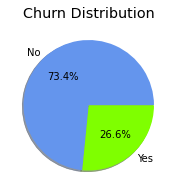

In [50]:
palette = ['#6495ED',"#7FFF00"]

plt.figure(figsize=(8,3))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',colors = palette,shadow=True);
plt.title("Churn Distribution")
df['Churn'].value_counts()

#autopct='%1.1f%%' tells Matplotlib to format the numeric values on the pie chart as floating-point numbers with one digit before and one 
#digit after the decimal point, followed by a percent sign.

**Categorical Distributions of independent variables**

Text(0.5, 1.0, 'Uni-Variate Analysis')

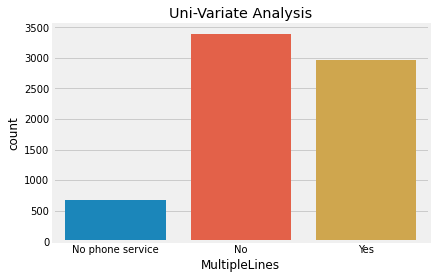

In [51]:
# This single one is for presentation purpose
sns.countplot(x=df["MultipleLines"])
plt.title("Uni-Variate Analysis")

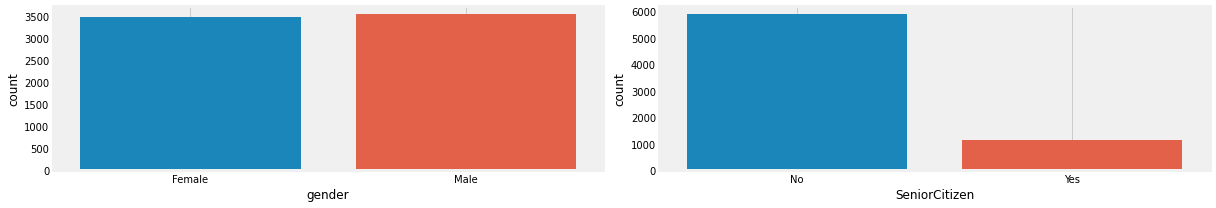

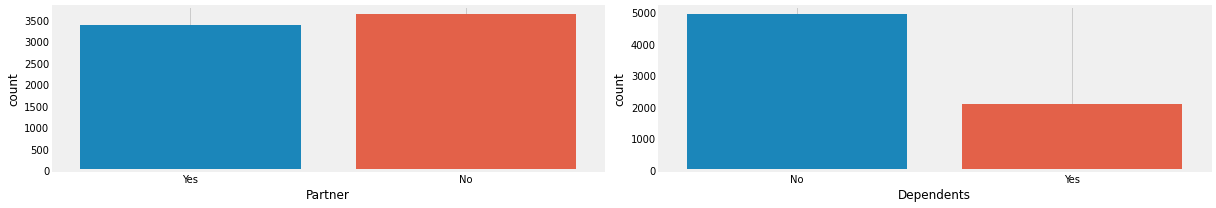

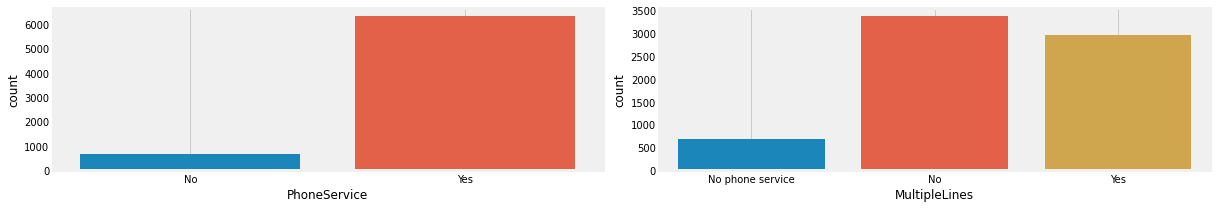

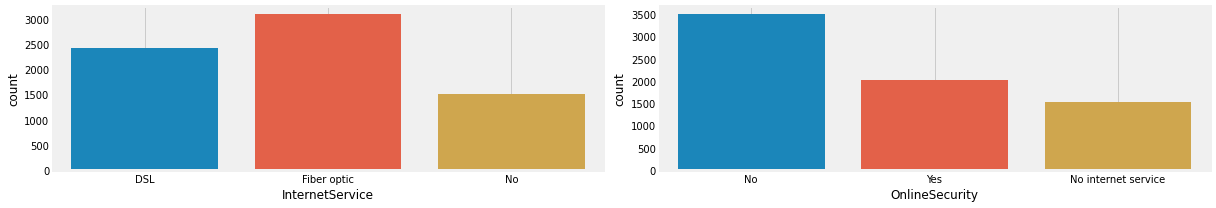

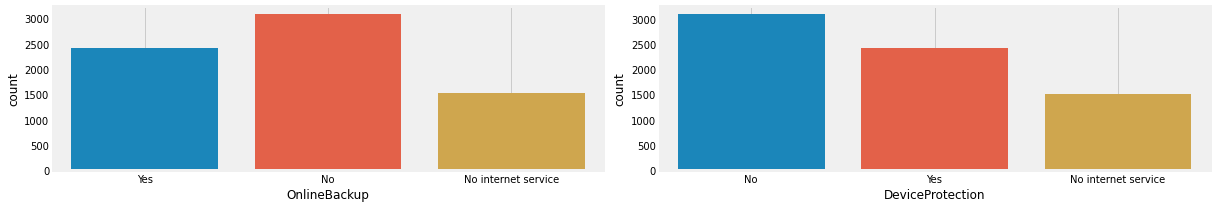

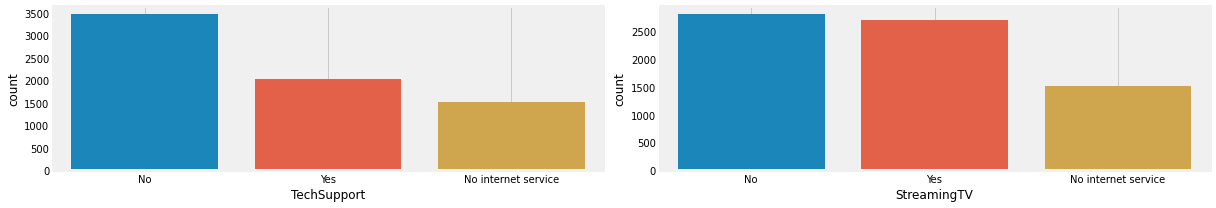

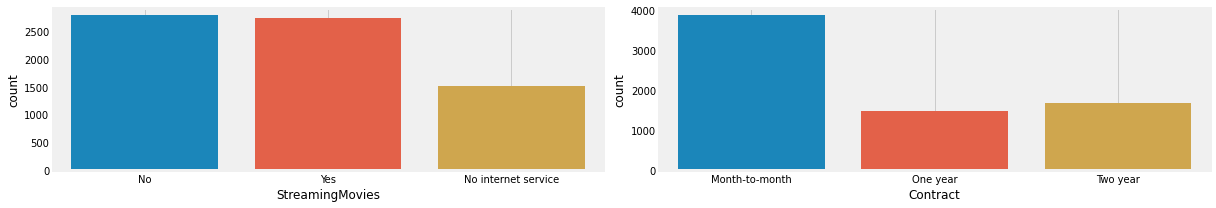

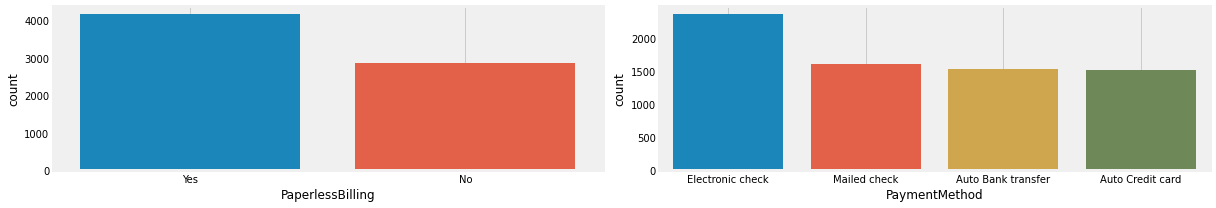

In [52]:
palette = ['#6495ED',"#7FFF00","#20B2AA","#FF8C00"]
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns # select only categorical columns
categorical_columns = [col for col in categorical_columns if col != "Churn"] # i dont need Churn to visualise

# Iterate over columns in pairs
for i in range(0, len(categorical_columns), 2):
    
    f, axs = plt.subplots(1, 2, figsize=(17, 3)) # to create subplots in each rows

    # Plot first attribute
    sns.countplot(x=df[categorical_columns[i]], ax=axs[0])
    axs[0].grid()

    # Plot second attribute if it exists
    if i + 1 < len(categorical_columns):
        sns.countplot(x=df[categorical_columns[i + 1]], ax=axs[1])
        axs[1].grid()

    plt.tight_layout()
    plt.show()   

**Numerical Distributions**

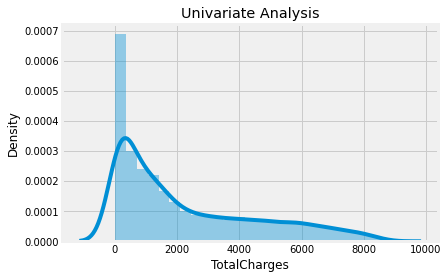

In [53]:
# single one is for presentation purpose

sns.distplot(df["TotalCharges"])
plt.title("Univariate Analysis");

In [54]:
numeric_columns = df.select_dtypes(exclude=['object']).columns #Select only neumeric columns

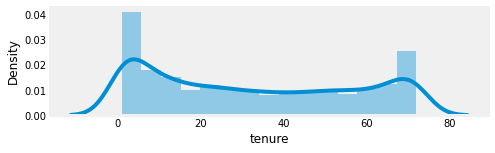

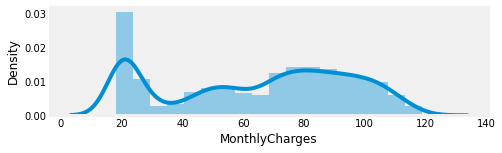

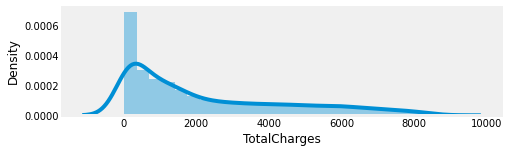

In [55]:
for col in df[numeric_columns].columns:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,2)) # To create plots 
    sns.distplot(df[numeric_columns][col]) #Distribution plot
    plt.grid()   


### Bi-Variate Analysis to check dependancies

**Relation between Categorical Independent variables with dependent Variable Churn**

Text(0.5, 1.0, 'Bi-Variate Analysis')

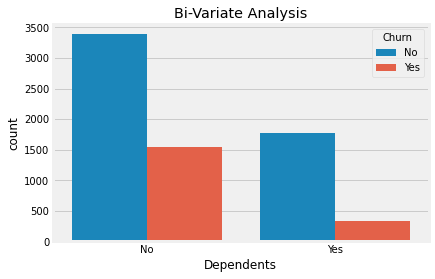

In [56]:
#This single one is for presentation purpose
sns.countplot(x=df["Dependents"],hue=df['Churn'])
plt.title("Bi-Variate Analysis")

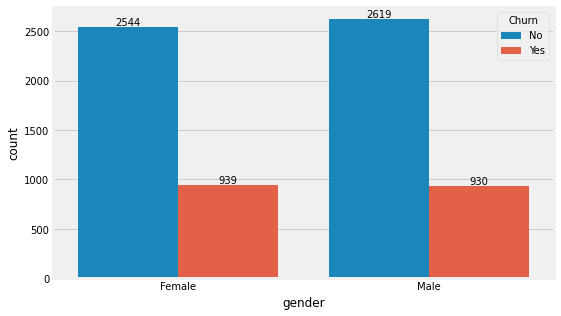

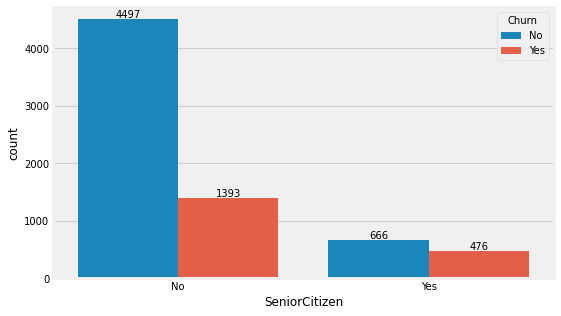

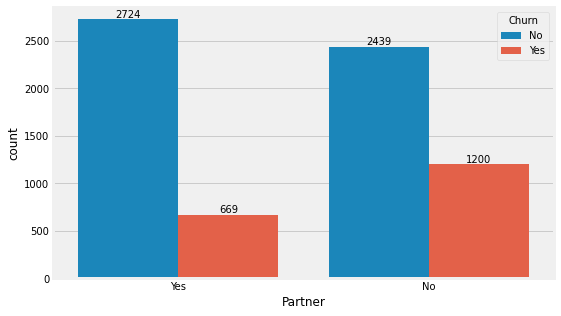

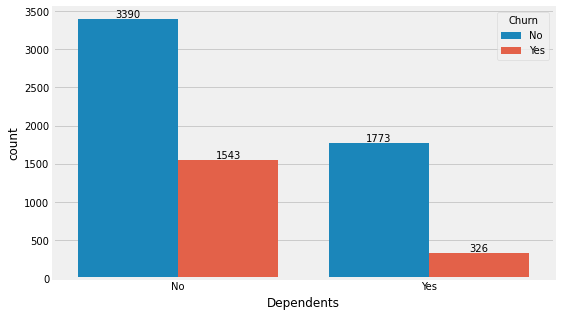

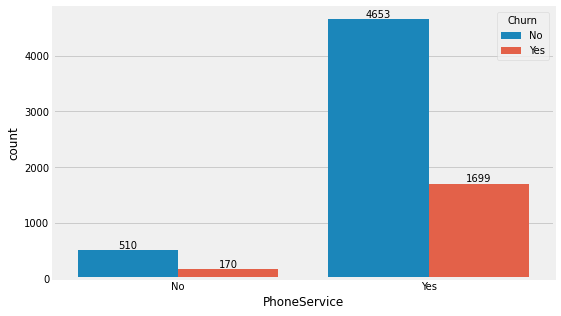

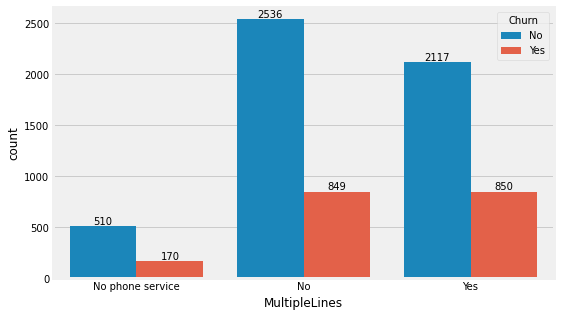

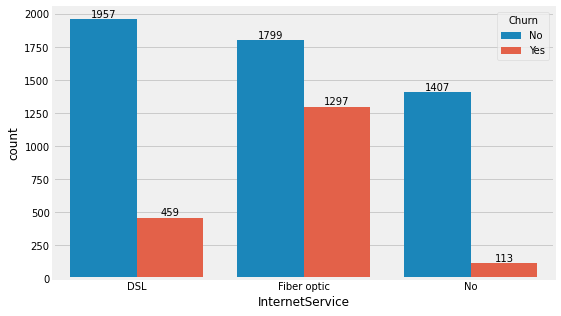

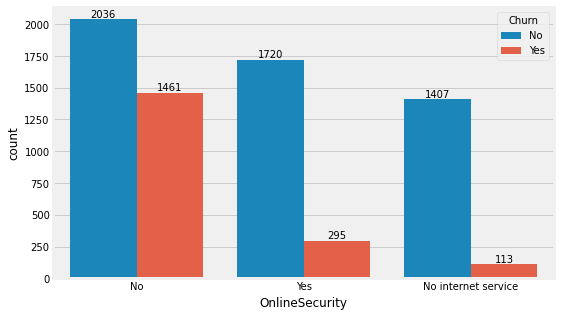

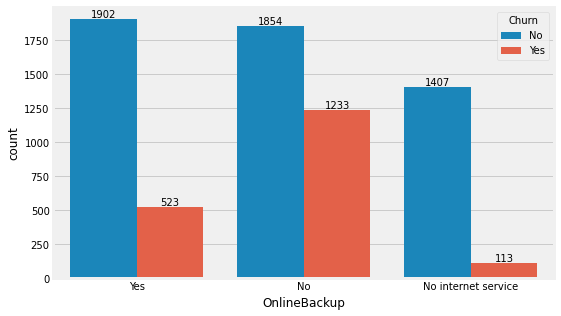

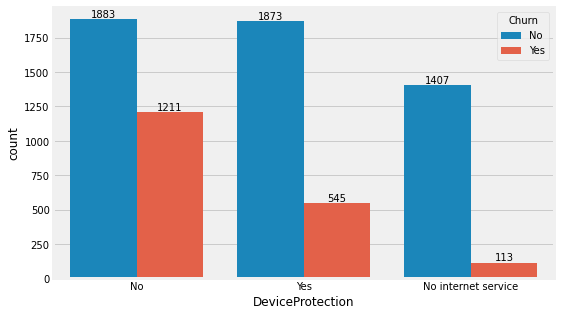

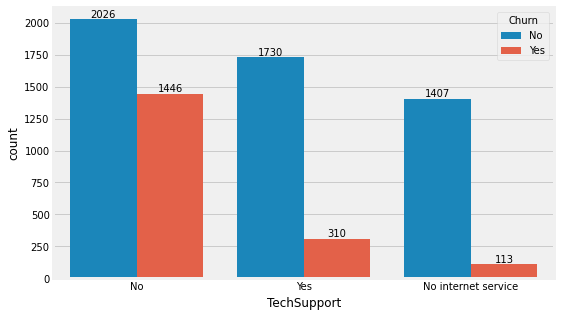

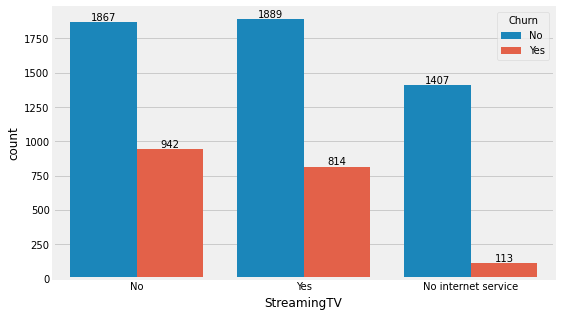

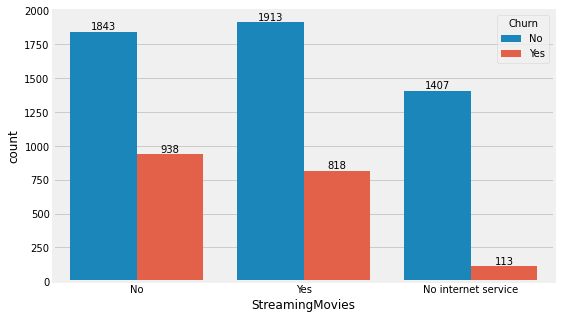

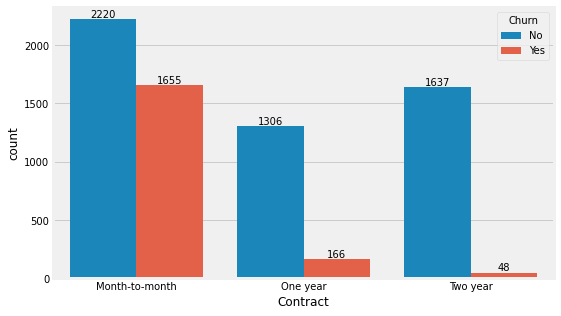

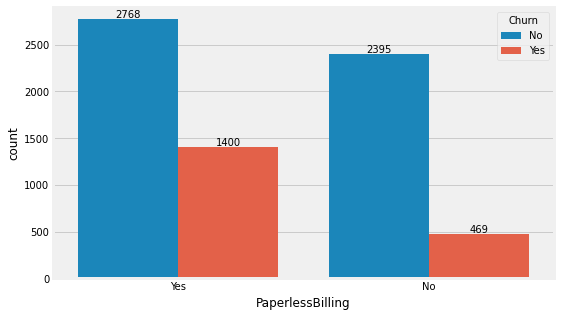

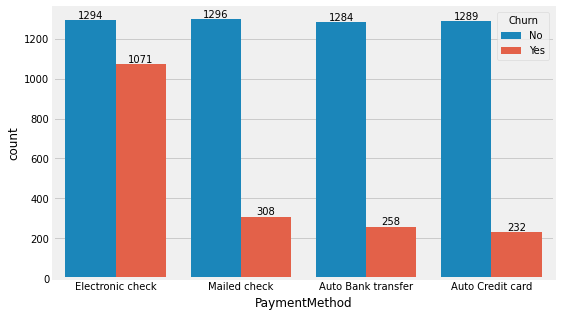

In [57]:
for column in categorical_columns:
    f, ax=plt.subplots(figsize=(8,5))
    ax = sns.countplot(x=df[column],hue=df['Churn']) #,palette='terrain_r'
    # Annotate the plot with counts
    for p in ax.containers:
        ax.bar_label(p, label_type='edge')
        plt.grid()

**Check Churning percentage to get a clear idea:**

**Example, When customer is Senior citizen or not senior citizen , what is the percentage of Churning each of them**

It will tell which label has highests or lowest churning rate with  numeric count

In [58]:
def demography(val1, val2):
    grouped_SC = df.groupby([val1, val2]).size().unstack(fill_value=0) #Count of each label as per Churning
    total_counts_SC = df[val1].value_counts() #Total count of each label
    print(val1)
    print(total_counts_SC) #Return total count of each label
    churn_percentages = grouped_SC.div(total_counts_SC, axis=0) * 100 # % of curning count with respect to total count
    return churn_percentages['Yes']  #% of churning count in each label

print(demography('gender', 'Churn'))
print(demography('SeniorCitizen', 'Churn'))
print(demography('Partner', 'Churn'))
print(demography('Dependents', 'Churn'))

gender
Male      3549
Female    3483
Name: gender, dtype: int64
Female    26.959518
Male      26.204565
Name: Yes, dtype: float64
SeniorCitizen
No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64
SeniorCitizen
No     23.650255
Yes    41.681261
Name: Yes, dtype: float64
Partner
No     3639
Yes    3393
Name: Partner, dtype: int64
Partner
No     32.976092
Yes    19.717065
Name: Yes, dtype: float64
Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64
Dependents
No     31.279140
Yes    15.531205
Name: Yes, dtype: float64


In [59]:
def account(val1, val2):
    grouped_SC = df.groupby([val1, val2]).size().unstack(fill_value=0) #Count of each label as per Churning
    total_counts_SC = df[val1].value_counts() #Total count of each label
    print(val1)
    print(total_counts_SC) #Return total count of each label
    churn_percentages = grouped_SC.div(total_counts_SC, axis=0) * 100 # % of curning count with respect to total count
    return churn_percentages['Yes']  #% of churning count in each label

print(account('Contract', 'Churn'))
print(account('PaperlessBilling', 'Churn'))
print(account('PaymentMethod', 'Churn'))

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Yes, dtype: float64
PaperlessBilling
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
No     16.375698
Yes    33.589251
Name: Yes, dtype: float64
PaymentMethod
Electronic check      2365
Mailed check          1604
Auto Bank transfer    1542
Auto Credit card      1521
Name: PaymentMethod, dtype: int64
Auto Bank transfer    16.731518
Auto Credit card      15.253123
Electronic check      45.285412
Mailed check          19.201995
Name: Yes, dtype: float64


In [60]:
def services(val1, val2):
    grouped_SC = df.groupby([val1, val2]).size().unstack(fill_value=0) #Count of each label as per Churning
    total_counts_SC = df[val1].value_counts() #Total count of each label
    print(val1)
    print(total_counts_SC) #Return total count of each label
    churn_percentages = grouped_SC.div(total_counts_SC, axis=0) * 100 # % of curning count with respect to total count
    return churn_percentages['Yes']  #% of churning count in each label


print(services('PhoneService', 'Churn'))
print(services('MultipleLines', 'Churn'))
print(services('InternetService', 'Churn'))
print(services('OnlineSecurity', 'Churn'))
print(services('DeviceProtection', 'Churn'))
print(services('TechSupport', 'Churn'))
print(services('StreamingTV', 'Churn'))
print(services('StreamingMovies', 'Churn'))

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64
No     25.000000
Yes    26.747481
Name: Yes, dtype: float64
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
No                  25.081241
No phone service    25.000000
Yes                 28.648466
Name: Yes, dtype: float64
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
DSL            18.998344
Fiber optic    41.892765
No              7.434211
Name: Yes, dtype: float64
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     41.778667
No internet service     7.434211
Yes                    14.640199
Name: Yes, dtype: float64
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                   

**Relation between Numeric Independent variables with dependent Variable Churn**

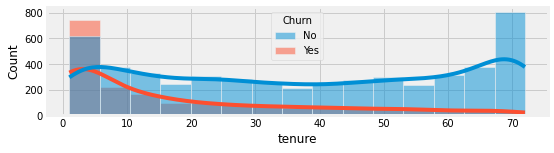

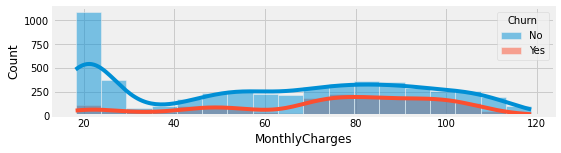

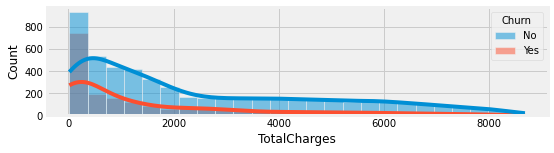

In [61]:
df_num=df.select_dtypes(exclude='object')

for column in df_num:
    f, ax=plt.subplots(figsize=(8,2))
    ax =sns.histplot(data=df_num,x=df_num[column],hue=df['Churn'],kde=True) #Histplot with Hue as "Churn" to check distribution relationship

### Multi-Variate Analysis

**Multi-collinearity Check and Linear/Non-Linear check**

Note: Multi-collinearity doesn't create problems in prediction capability in classification models but in the Interpretability.
One should always be concerned about the multi-collineartity, regardless of the model/method being linear or not, especially when feature importance is very important which describe the driving force of Churn in any retention project

**Multi-collinearity Check between Numeric Variables**

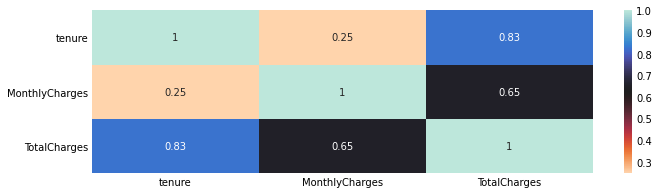

In [62]:
plt.figure(figsize=(10,3))
sns.heatmap(df.corr(),annot=True,cmap='icefire_r'); #Heat map to check the correlaion scores, High means strong corrrelations

<AxesSubplot: xlabel='tenure', ylabel='TotalCharges'>

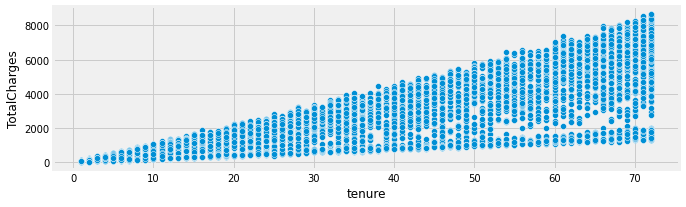

In [63]:
plt.figure(figsize=(10,3))
sns.scatterplot(df["tenure"], df["TotalCharges"]) #Scatter plot to check linearity more clearly

**Hypthesis Testing for categorical variables**

**Linearity check with independent categorical variables and Target column Churn**

Cant use heat map or scatter plot, because we are checking with categorical variables, so to be more precise I will use Hypthesis Testing

Target is also categorical, so I will use  - "Chi-Square test"

For Chi-squared independence test first create a contingency table and using Scipy's stats package find the p value.

**Null Hypothesis: There is no linearity between the variables**

**Alternate Hypothesis: There is linearity between the variables**

**Alpha: 0.05**

In [64]:
df_chi = df.select_dtypes(exclude=["float","int64"]) #Need only categorical columns to tets Chi-Square

def compare(df_chi, ind_column, target_column):   
    alpha = 0.05
    
    contigenency_tab = pd.crosstab(df_chi[ind_column], df_chi[target_column]) #Creating contingency table
    
    ''' Contingency table look like below, example Gender and Churn
    
       Churn    No     Yes
       gender
       Female  2544    939
       Male    2619    930
       
    ''' 
    chi2, p, dof, ex = stats.chi2_contingency(contigenency_tab) #Measurement of p-value
    
    if p < alpha:
        return("P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between {} and {}".format(ind_column, target_column))
    else:
        return ("Assuming no linearity between {} and {}".format(ind_column, target_column))
print(compare(df_chi, "gender","Churn"))
print(compare(df_chi, "SeniorCitizen","Churn"))
print(compare(df_chi, "Partner","Churn"))
print(compare(df_chi, "Dependents","Churn"))
print(compare(df_chi, "PhoneService","Churn"))
print(compare(df_chi, "MultipleLines","Churn"))
print(compare(df_chi, "InternetService","Churn"))
print(compare(df_chi, "OnlineSecurity","Churn"))
print(compare(df_chi, "OnlineBackup","Churn"))
print(compare(df_chi, "DeviceProtection","Churn"))
print(compare(df_chi, "TechSupport","Churn"))
print(compare(df_chi, "StreamingTV","Churn"))
print(compare(df_chi, "StreamingMovies","Churn"))
print(compare(df_chi, "Contract","Churn"))
print(compare(df_chi, "PaperlessBilling","Churn"))
print(compare(df_chi, "PaymentMethod","Churn"))

Assuming no linearity between gender and Churn
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between SeniorCitizen and Churn
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between Partner and Churn
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between Dependents and Churn
Assuming no linearity between PhoneService and Churn
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between MultipleLines and Churn
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between InternetService and Churn
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between OnlineSecurity and Churn
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between OnlineBackup and Churn
P value < alpha (0.05), so rejecting th

**Check correlation between independent categorical features to understand categorical multi-collinearity**

In [65]:
chi_wihtin_1 = ('gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod')

chi_wihtin_2 = ('gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod')

cat_var_prod = list(product(chi_wihtin_1,chi_wihtin_2, repeat = 1)) # creating each combination of feature to measure relationsip

for i in cat_var_prod:
    if i[0] != i[1]: # I dont want test between similar feature combination, example: Gender with Gender
        print(compare(df_chi, i[0],i[1]))

Assuming no linearity between gender and SeniorCitizen
Assuming no linearity between gender and Partner
Assuming no linearity between gender and Dependents
Assuming no linearity between gender and PhoneService
Assuming no linearity between gender and MultipleLines
Assuming no linearity between gender and InternetService
Assuming no linearity between gender and OnlineSecurity
Assuming no linearity between gender and OnlineBackup
Assuming no linearity between gender and DeviceProtection
Assuming no linearity between gender and TechSupport
Assuming no linearity between gender and StreamingTV
Assuming no linearity between gender and StreamingMovies
Assuming no linearity between gender and Contract
Assuming no linearity between gender and PaperlessBilling
Assuming no linearity between gender and PaymentMethod
Assuming no linearity between SeniorCitizen and gender
Assuming no linearity between SeniorCitizen and Partner
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a c

P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between MultipleLines and Contract
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between MultipleLines and PaperlessBilling
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between MultipleLines and PaymentMethod
Assuming no linearity between InternetService and gender
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between InternetService and SeniorCitizen
Assuming no linearity between InternetService and Partner
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between InternetService and Dependents
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between InternetService and PhoneService
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity b

P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between TechSupport and Dependents
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between TechSupport and PhoneService
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between TechSupport and MultipleLines
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between TechSupport and InternetService
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between TechSupport and OnlineSecurity
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between TechSupport and OnlineBackup
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between TechSupport and DeviceProtection
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of lineari

P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between PaperlessBilling and StreamingMovies
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between PaperlessBilling and Contract
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between PaperlessBilling and PaymentMethod
Assuming no linearity between PaymentMethod and gender
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between PaymentMethod and SeniorCitizen
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between PaymentMethod and Partner
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity between PaymentMethod and Dependents
Assuming no linearity between PaymentMethod and PhoneService
P value < alpha (0.05), so rejecting the Null Hypothesis and assuming a chance of linearity bet

**Linearity check with numerical variables and Target column Churn**

As I can already see, from above categorical attributes are having both linear and non-linear fields present. So, its confirm what is the type of data. And also I can see from the heat map, and chi-square test that there is presence of multi-collinearity. So, collinearity check with target and numeric field, I am skipping at this stage. I will plot later after cleaning. What i wanted to understand, I found it

### Outlier Check

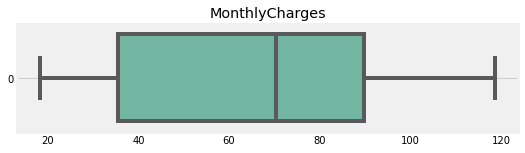

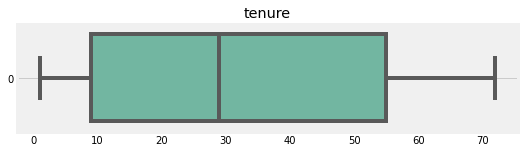

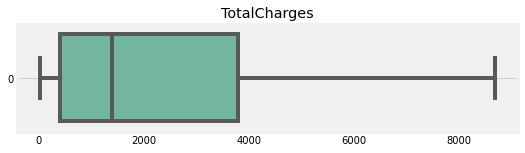

In [66]:
lst = ["MonthlyCharges","tenure","TotalCharges"] #Only the numeric field

for col in lst:
    f, ax=plt.subplots(figsize=(8,2)) #to plot one by one
    plt.title(col)
    ax = sns.boxplot(data=df[col],palette="Set2",orient='h') #Plotting
    plt.grid()

# Feature Engineering

In [67]:
df_processed = df.copy() #Create a new data set, because we are going to play with the original form

### New feature based on existing feature

**Binning**

We do have a lot of features having 0 and 1. Therefore, based on existing feature we may extract new feature that will add more information to the model.

We do have a feature as tenure, that represents a customer's period in the company. And it has values as 1-72 as some continous values, which may look like random Id which we call Noise. Therefore, to represent this feature as an important one, I will do Binning on this feature and make it categorical as below.

1. 1-12 tenure
2. 13-24
3. 25-36
4. 37-48
5. 49-60
6. 61-72

Now this new feature will tell me the proper segmentation of customers in terms of new or long-term customers

In [68]:
bins_names = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)] #createing bin names like: 1-12,, 13-14 and so on

feature_name="customer_tenure" #New fetaure name to create

df_processed[feature_name] = pd.cut(df_processed["tenure"], range(1, 80, 12), right=False, labels=bins_names) #Binning

df_processed.drop("tenure", axis=1,inplace=True) # no need to tenure now as i have created a separate field from this

df_processed["customer_tenure"].value_counts() #To check how this feature is distributed

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: customer_tenure, dtype: int64

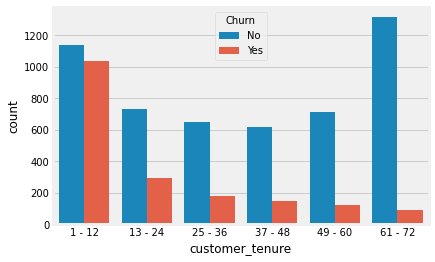

In [69]:
# Check how tenure has impact on churing
sns.countplot(df_processed["customer_tenure"], hue=df_processed["Churn"]);

### Data Encoding

**Binary Encoding**: "Churn" feature is the target variable, which I will make Yes as 1 and No as 0. 

**One-Hot Encoding including all the lables**: One-Hot encoding gives importance to each label, which is very important in any customer retention project as the idea is to extract important drivers behind churners.

MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies are all having 3 values which is No/Yes that is Binary along with "No internet Service", so all togther it is nominal + binary, so I will use One-Hot encoding to preserve the information of yes, no along with no internet service without much confusion for the model. I am not combining No and No internet service as one, because these two are having different meaning. No, means customer has taken the internet service but  has not taken the other service, and No internet service means, customer has not taken the internet service and therefore bydefault the other service is also not available. 

**Will be using Tree-based model along with regularization of Logistic regression, so Multi-collinearity should not be an issue from one-hot encoding, and I will also perform feature importance**

In [70]:
# Binary Encoding as described before, manually asssigning values as per their Binary values

Binary_cols = ["Churn"] #Target variable

for col in Binary_cols:
    df_processed[col].replace(to_replace="Yes", value = 1, inplace = True) #Making Yes to 1
    df_processed[col].replace(to_replace = "No", value = 0, inplace = True) #Making No to 0

### Class Imbalance

In [71]:
df_processed["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

1. Handling this depends completely on the domain knowledge

2. In any industry Churning rate would always be less in compare to non-churned, so it is expected in customer retention project.

3. Resampling for the sake of having a class balance artificially also is not recommended when churning difference is expected to be different.

4. If risk of an event occurring is important, and classes are rare, then resampling can turn a perfectly good model to bad

5. But just for experimentation purpose, I will also check my model with and without resampling. Some model like Tree-based have tendency to become worst if using synthetic data. So, Will chose as per the best performance

### Split the data

In [72]:
X = df_processed.drop("Churn", axis=1) #need only independent features
y = df_processed["Churn"] #Need only dependent feature (target)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1, stratify = y)

# As imbalance class is present, therefore class distribution proportionality should be equal in both train and test, and therefore
# I have given stratify = y to assign equal proportionality of the class in both train and test

In [73]:
#To check class distribution is evenly distributed in train and test or not
print(y_train.value_counts(normalize=True)) #Normalize to check the proportions
print(y_test.value_counts(normalize=True))

0    0.734168
1    0.265832
Name: Churn, dtype: float64
0    0.734357
1    0.265643
Name: Churn, dtype: float64


In [74]:
#Check the size
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 19)
(1758, 19)
(5274,)
(1758,)


### One-Hot Encoding transform

In [75]:
#Creating transformation pipeline for categorical variables
transformer = make_column_transformer((OneHotEncoder(),
                                       ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling","gender","Contract","PaymentMethod", "InternetService", "MultipleLines", "OnlineSecurity","customer_tenure","OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" , "StreamingMovies"]))

In [76]:
# Just a list of categorical variables
cate = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling","gender","Contract","PaymentMethod", "InternetService", "MultipleLines", "OnlineSecurity","customer_tenure","OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" , "StreamingMovies"]

**Train data**

In [77]:
transformed = transformer.fit_transform(x_train) # It will transform the abve listed features from x_train
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out()) #make a dataframe with transformed cols
transformed_df.index = x_train.index #Get their index
x_train = pd.concat([x_train, transformed_df], axis=1) #Concat both
x_train.drop(cate, axis=1, inplace=True) #Delete the non-transformed categories
x_train.head(3)

,MonthlyCharges,TotalCharges,onehotencoder__SeniorCitizen_No,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_No,onehotencoder__PhoneService_Yes,...,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes
1241,64.50,1888.45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1301,58.20,3810.80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1604,95.75,6511.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


**Test data**

In [78]:
#Same as above descriptions
transformed = transformer.transform(x_test)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.index = x_test.index
x_test = pd.concat([x_test, transformed_df], axis=1)
x_test.drop(cate, axis=1, inplace=True)
x_test.head(3)

,MonthlyCharges,TotalCharges,onehotencoder__SeniorCitizen_No,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_No,onehotencoder__PhoneService_Yes,...,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes
5585,19.3,19.30,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5188,101.5,2917.65,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5567,103.0,5166.20,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


**Rename column names**

The encoded column names have name starts with onehotencoder__, therefore, I will remove and make them the original name for better visualisation purpose

In [79]:
remove_dict = []
original = []
for col in x_train.columns:
    if col.startswith("onehotencoder__"):
        remove_dict.append(col)
        original_name = col.replace("onehotencoder__", "")
        original.append(original_name)
        
rename_dict = dict(zip(remove_dict, original))

x_train.rename(columns=rename_dict, inplace=True)
x_test.rename(columns=rename_dict, inplace=True)

In [80]:
# as One-hoting encoding is being done on the splitted data, therefore concating and making a dataframe for future use if required
df_processed = pd.concat([x_train, x_test])
y_processed = pd.concat([y_train,y_test])

df_processed.insert(0, "Churn",y_processed)

###  Correlation of independent variables with Churning using the transformed data

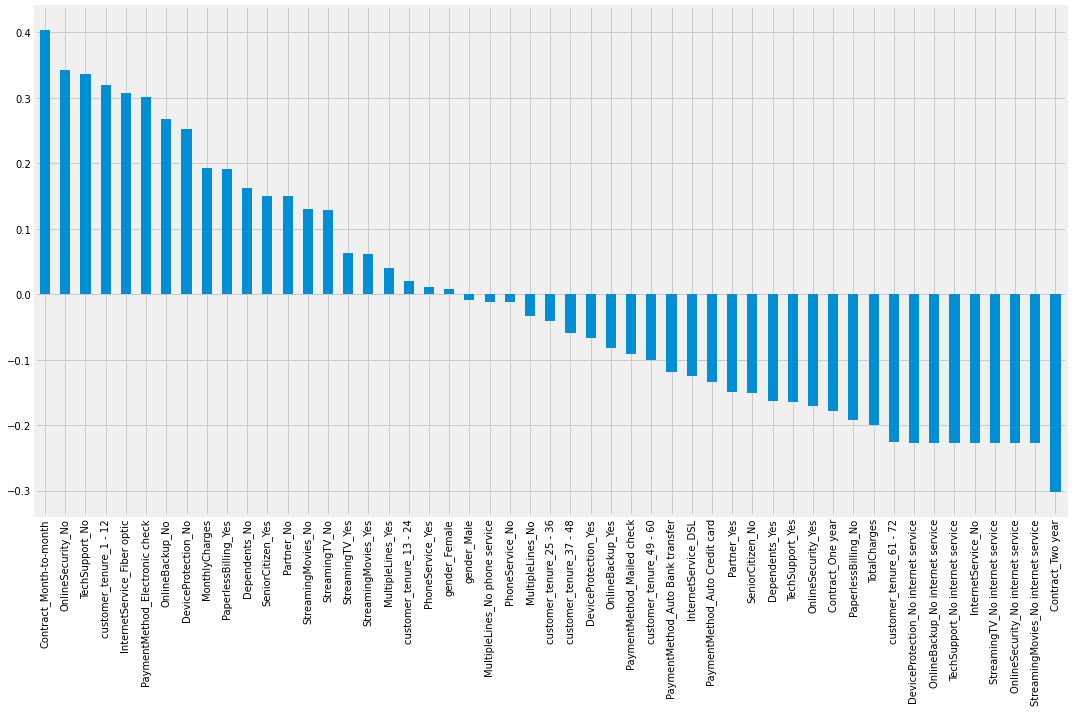

In [81]:
plt.figure(figsize=(15,10))
df_processed.corr()["Churn"].sort_values(ascending=False)[1:].plot(kind='bar');
plt.tight_layout()
plt.show()

### Sampling (If required)

SMOTE ideally is not recommended in cases, so I am using only for experimentation purpose

In [82]:
sm = SMOTE(random_state=202)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

### Scalling 

Features having values as 0 and 1, no require for scalling as the range is same. But I will scale only MonthlyCharges, and TotalCharges as values are spread out

Using StandardScaler because it will keep all the values nearer to mean by making mean as 0 and standard deviation as 1. With standardscaler, the Logistic Regression's interpretability is more clear as I want information as much as possible in terms of feature importances.

Whether scaling or not scaling, Tree based algorithms have no affect as they work based on information gain.

In [83]:
# StandardScaler
scale = StandardScaler()
scaled_cols = ["MonthlyCharges","TotalCharges"]

x_train_scale = x_train.copy() #Copying as I dont want to disturb the original one
x_test_scale = x_test.copy()

x_train_scale[scaled_cols] = scale.fit_transform(x_train_scale[scaled_cols]) #Fit on train

x_test_scale[scaled_cols] = scale.transform(x_test_scale[scaled_cols]) #Transform on test as in train


In [84]:
x_train_scale.head()

,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
1241,-0.008816,-0.172578,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1301,-0.217370,0.674161,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1604,1.025677,1.863630,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
934,-1.031723,-0.812583,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
621,0.903193,1.530876,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Model Building

### Decision Tree

**Simple Tree**

In [85]:
model_DT = DecisionTreeClassifier(random_state=100) #define model

model_DT.fit(x_train, y_train) #fit on training data

y_pred_dt_test = model_DT.predict(x_test) #predict on test data with the fitted model

y_pred_dt_train = model_DT.predict(x_train) #predict on training data

#Evaluate the Model

print("Test Evaluation")
print(classification_report(y_pred_dt_test, y_test))
print("***************************************************************")
print("Train Evaluation")
print(classification_report(y_pred_dt_train, y_train))

Test Evaluation
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1301
           1       0.50      0.51      0.50       457

    accuracy                           0.74      1758
   macro avg       0.66      0.66      0.66      1758
weighted avg       0.74      0.74      0.74      1758

***************************************************************
Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       0.99      1.00      0.99      1386

    accuracy                           1.00      5274
   macro avg       0.99      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274



**Decision Tree using Grid Search CV to reduce overfitting and better performance**

In [86]:
model_DT_grid = DecisionTreeClassifier(random_state= 100)

param_grid_dt={'max_depth':[4, 6, 8, 10, 20], #Maximum depth of the tree
            'min_samples_leaf':[5, 10, 20, 50, 100], #Samples to draw in each leaf
            'min_samples_split':[4, 6, 8, 10, 20], #Samples for each splitting
            'max_features':['log2'], #No of features to draw to reduce overfitting
            'criterion': ["gini", "entropy"] #Measurement to calculate information gain from each feature
            } #Defining each parameters 

grid_search_DT = GridSearchCV(estimator=model_DT_grid, param_grid=param_grid_dt, cv = 5, scoring='recall') #Defining GridSearh

grid_search_DT.fit(x_train, y_train) #Fitting the GridSearch to find best estimator

# Get the best parameters and best estimator
best_params = grid_search_DT.best_params_

print(best_params)

best_model_grid_DT = grid_search_DT.best_estimator_

y_pred_dt = best_model_grid_DT.predict(x_test) #predict using best estimator on test
y_pred_train = best_model_grid_DT.predict(x_train) #predict using best estimator on train

#Evaluate the Model

print("Test Evaluation")
print(classification_report(y_pred_dt, y_test))
print("***************************************************************")
print("Train Evaluation")
print(classification_report(y_pred_train, y_train))

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4}
Test Evaluation
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1434
           1       0.43      0.62      0.51       324

    accuracy                           0.78      1758
   macro avg       0.67      0.72      0.68      1758
weighted avg       0.82      0.78      0.79      1758

***************************************************************
Train Evaluation
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4260
           1       0.50      0.70      0.59      1014

    accuracy                           0.81      5274
   macro avg       0.71      0.77      0.73      5274
weighted avg       0.84      0.81      0.82      5274



**Checking if SMOTE has any impact on Decision Tree**

In [87]:
grid_search_DT = GridSearchCV(estimator=model_DT_grid, param_grid=param_grid_dt, cv = 5, scoring='recall')
grid_search_DT.fit(x_train_smote, y_train_smote)

# Get the best parameters and best score
best_params = grid_search_DT.best_params_
print(best_params)
y_pred_dt = grid_search_DT.predict(x_test)
y_pred_train = grid_search_DT.predict(x_train_smote)

#Evaluate the Model

print("Test Evaluation")
print(classification_report(y_pred_dt, y_test))
print("***************************************************************")
print("Train Evaluation")
print(classification_report(y_pred_train, y_train_smote))

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20}
Test Evaluation
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1250
           1       0.60      0.55      0.58       508

    accuracy                           0.77      1758
   macro avg       0.71      0.70      0.71      1758
weighted avg       0.76      0.77      0.76      1758

***************************************************************
Train Evaluation
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3949
           1       0.82      0.84      0.83      3795

    accuracy                           0.83      7744
   macro avg       0.83      0.83      0.83      7744
weighted avg       0.83      0.83      0.83      7744



**SMOTE worsen the model performance**

**Decision Tree on Scaled data**

In [88]:
grid_search_DT = GridSearchCV(estimator=model_DT_grid, param_grid=param_grid_dt, cv = 5, scoring='recall')
grid_search_DT.fit(x_train_scale, y_train)

# Get the best parameters and best score
best_params = grid_search_DT.best_params_
print(best_params)
y_pred_dt = grid_search_DT.predict(x_test_scale)
y_pred_train = grid_search_DT.predict(x_train_scale)

#Evaluate the Model

print("Test Evaluation")
print(classification_report(y_pred_dt, y_test))
print("***************************************************************")
print("Train Evaluation")
print(classification_report(y_pred_train, y_train))

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4}
Test Evaluation
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1434
           1       0.43      0.62      0.51       324

    accuracy                           0.78      1758
   macro avg       0.67      0.72      0.68      1758
weighted avg       0.82      0.78      0.79      1758

***************************************************************
Train Evaluation
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4260
           1       0.50      0.70      0.59      1014

    accuracy                           0.81      5274
   macro avg       0.71      0.77      0.73      5274
weighted avg       0.84      0.81      0.82      5274



**Result**

1. Simple Decision Tree: only 51% recall
2. **Decision Tree with Grid Search Hyperparameter Tuning improved to 62% recall with negligible overfitting and accuracy of 78%**
3. Decision Tree on SMOTE data, reduced again to 55%, making it worst
4. Decision Tree using Scaled data is similar to decesion tree using normal data as in no-2 its which proving the assumption about the model that Tree based models do not always affect by the high range value 

### XGboost (Extreme Gradient Boosting)

**Base XGboost**

In [89]:
xgb_model = xgb.XGBClassifier(seed=27) #Define the model

xgb_model.fit(x_train, y_train) #fit on train

y_pred_xgb = xgb_model.predict(x_test) #predict on test

print(classification_report(y_pred_xgb, y_test)) #evaluations

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1362
           1       0.49      0.58      0.54       396

    accuracy                           0.77      1758
   macro avg       0.68      0.71      0.69      1758
weighted avg       0.79      0.77      0.78      1758



**Feature Importance using RFE (Recursive Feature Eliminations)**

In [90]:
rfe = RFE(estimator=xgb_model) #Defining the RFE model

rfe.fit(x_train, y_train) #Fittint it on traing data to search for best features

selected_features = x_train.columns[rfe.support_] #columns having importance derived by the RFE 

print(selected_features)

X_train_rfe = x_train[selected_features] #Create new data set with only important feature on train and test both
X_test_rfe = x_test[selected_features]
print(X_train_rfe.shape) # How many features are selected as best

Index(['MonthlyCharges', 'TotalCharges', 'SeniorCitizen_No', 'Dependents_No',
       'PhoneService_No', 'PaperlessBilling_No', 'gender_Female',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'customer_tenure_1 - 12', 'customer_tenure_13 - 24', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')
(5274, 25)


**XGBoost with Grid Search CV**

In [91]:
xgb_model = xgb.XGBClassifier(seed = 27) #define the model

param_grid= {
             "max_depth":[4, 6], #depth of the tree
             "min_child_weight":[4, 6], #minimum sample to create partition
             "gamma":[0.0,0.1], #minimum loss reduction
             "subsample":[0.8,0.9], #randomly extracted sample
             "colsample_bytree":[0.8,0.9], #no of columns to be randomly extracted for each tree   
             "scale_pos_weight": [2.7], # Controls the balance of positive and negative weights, useful for imbalanced classes
             "max_delta_step":[1],# Help in logistic regression when class is imbalanced
             "learning_rate":[0.1, 0.001], #weight 
             "objective":['binary:logistic'], #logistic regression for binary classification
             "nthread":[4], #number of parallel threads used to run XGBoost
             "n_estimators":[500, 1000] #how many decision trees to build
}

#n_jobs=-1 means all the parameters mentioned in the grid searcg CV will run parralelly by utilising each CPU Core

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1,cv=5,scoring='recall')

model_cv = grid_search_xgb.fit(x_train,y_train)

y_pred= model_cv.predict(x_test)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search_xgb.best_params_)
print("Best score: ", grid_search_xgb.best_score_)

print("**Test**")
print(classification_report(y_test,y_pred))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train,model_cv.predict(x_train)))

#A typical value to consider for scale_pos_weight: sum(negative instances) / sum(positive instances)

Best set of hyperparameters:  {'colsample_bytree': 0.9, 'gamma': 0.0, 'learning_rate': 0.001, 'max_delta_step': 1, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 2.7, 'subsample': 0.9}
Best score:  0.8231215048296899
**Test**
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1291
           1       0.49      0.82      0.62       467

    accuracy                           0.73      1758
   macro avg       0.70      0.76      0.70      1758
weighted avg       0.80      0.73      0.74      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      3872
           1       0.52      0.85      0.65      1402

    accuracy                           0.75      5274
   macro avg       0.72      0.78      0.73      5274
we

**Using the important features from RFE**

In [92]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1,cv=5,scoring='recall')
model_cv = grid_search_xgb.fit(X_train_rfe,y_train)

y_pred= model_cv.predict(X_test_rfe)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search_xgb.best_params_)
print("Best score: ", grid_search_xgb.best_score_)

print("**Test**")
print(classification_report(y_test,y_pred))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train,model_cv.predict(X_train_rfe)))

Best set of hyperparameters:  {'colsample_bytree': 0.9, 'gamma': 0.0, 'learning_rate': 0.001, 'max_delta_step': 1, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 1000, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 2.7, 'subsample': 0.9}
Best score:  0.8259659379766141
**Test**
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1291
           1       0.49      0.82      0.62       467

    accuracy                           0.73      1758
   macro avg       0.70      0.76      0.70      1758
weighted avg       0.80      0.73      0.74      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      3872
           1       0.52      0.85      0.65      1402

    accuracy                           0.75      5274
   macro avg       0.72      0.78      0.73      5274
we

**Similar output, seems like XGBoost is able to identify the interactions**

**Random Search CV (Computationaly better than Grid Search CV)**

In [93]:
xgb_model = xgb.XGBClassifier(seed = 27)

param_grid= {
             "max_depth":stats.randint(4, 10), #depth of the tree
             "min_child_weight":stats.randint(4, 10), #minimum sample to create partition
             "gamma":stats.uniform(0.0,0.3), #minimum loss reduction
             "subsample":stats.uniform(0.5, 1.0), #randomly extracted sample
             "colsample_bytree":stats.uniform(0.5, 1.0), #no of columns to be randomly extracted for each tree   
             "scale_pos_weight": [2.7], # Controls the balance of positive and negative weights, useful for imbalanced classes
             "max_delta_step":[1],# Help in logistic regression when class is extremely imbalanced
             "learning_rate":stats.uniform(0.0001, 0.01),
             "objective":['binary:logistic'],
             "loss": ['deviance', 'exponential'],
             "nthread":[4], #number of parallel threads used to run XGBoost
             "n_estimators":stats.randint(350, 1000)
}

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

random_search_xgb = RandomizedSearchCV(estimator=xgb_model, random_state = 27,param_distributions=param_grid, n_iter=15 ,cv=5,scoring='recall')

random_search_xgb.fit(x_train,y_train)

best_model_RF = random_search_xgb.best_estimator_

y_pred= best_model_RF.predict(x_test)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search_xgb.best_params_)
print("Best score: ", random_search_xgb.best_score_)

print("**Test**")
print(classification_report(y_test,y_pred))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train,best_model_RF.predict(x_train)))

Best set of hyperparameters:  {'colsample_bytree': 0.515087921518884, 'gamma': 0.11796418684683466, 'learning_rate': 0.002203275702028241, 'loss': 'deviance', 'max_delta_step': 1, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 954, 'nthread': 4, 'objective': 'binary:logistic', 'scale_pos_weight': 2.7, 'subsample': 0.8475254937567422}
Best score:  0.8081494661921708
**Test**
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1291
           1       0.50      0.81      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.75      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      3872
           1       0.54      0.85      0.66      1402

    accuracy                   

**82% Recall and 73% accuracy in GridSearchCV (Computationaly very slow) and 81% Recall with 74% accuracy using RandomSearchCV (Computationaly very good)**

<AxesSubplot: >

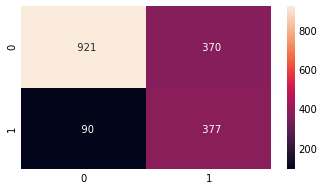

In [94]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='5g')

**Feature Importances by XGBoost**

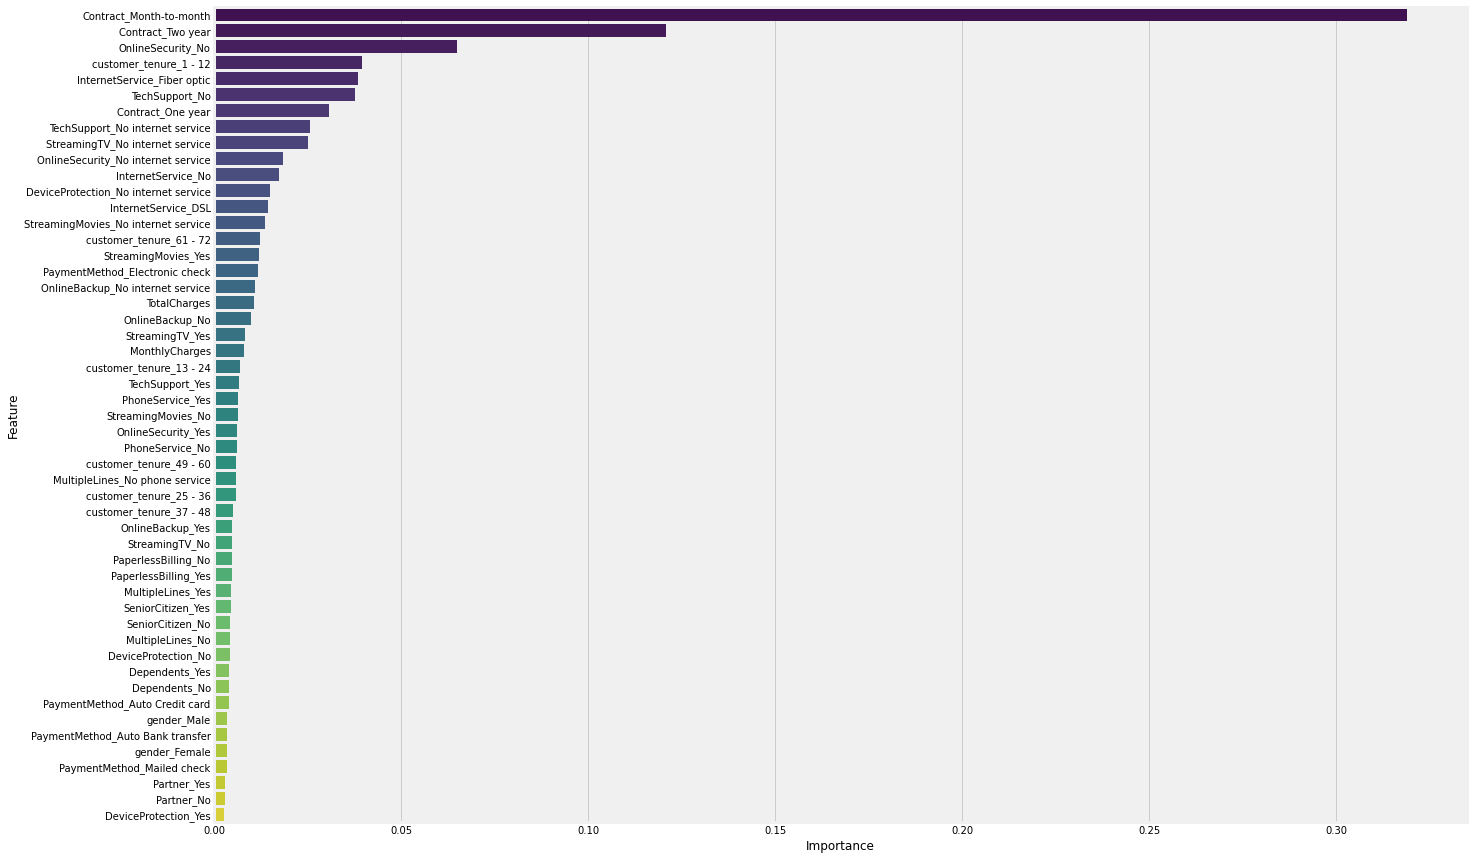

In [95]:
feature_importances = best_model_RF.feature_importances_ #extract the importances

sorted_idx = np.argsort(feature_importances)[::-1] #sort them

# Create a DataFrame for the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': x_train.columns[sorted_idx],
    'Importance': feature_importances[sorted_idx]
})

plt.figure(figsize=(20, 15)) #fit the size
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis'); #plot it

### Balanced Random Forest

**Simple Random forest**

A BalancedRandomForestClassifier differs from a classical random forest by the fact that it will draw a bootstrap sample from the minority class and sample with replacement the same number of samples from the majority class, useful classifier when data is imbalanced

In [96]:
rf_bcw = BalancedRandomForestClassifier(random_state= 1) #define the model

rf_bcw.fit(x_train, y_train) #fit on train

y_pred_bcw = rf_bcw.predict(x_test) #predict on test
y_pred_bcw_trn = rf_bcw.predict(x_train) #predict on train

print("**Test**")
print(classification_report(y_test,y_pred_bcw))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train,y_pred_bcw_trn))

**Test**
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1291
           1       0.49      0.79      0.60       467

    accuracy                           0.72      1758
   macro avg       0.69      0.74      0.70      1758
weighted avg       0.79      0.72      0.74      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3872
           1       0.70      1.00      0.82      1402

    accuracy                           0.89      5274
   macro avg       0.85      0.92      0.87      5274
weighted avg       0.92      0.89      0.89      5274



**Good score but highly Overfitting**

**Random Forest Hyperparameter Tuning to reduce overfitting**

In [97]:
# Define the parameter grid to search for the best parameters
param_grid = {
    'n_estimators': [300, 450, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [1, 2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10, 15],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

brf_model = BalancedRandomForestClassifier(random_state=1) #define the model

random_search_RF = RandomizedSearchCV(estimator=brf_model, param_distributions=param_grid,n_iter = 15, cv=5, scoring='recall')
# 77% Recall

random_search_RF.fit(x_train, y_train) #fit it

best_brf_model = random_search_RF.best_estimator_ #best estimator by random search

print(random_search_RF.best_params_) #best params

y_pred_brf_tst = best_brf_model.predict(x_test) #prediction on test

y_pred_brf_trn = best_brf_model.predict(x_train) #prediction on train

print("**Test**")
print(classification_report(y_test,y_pred_brf_tst))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train,y_pred_brf_trn))

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
**Test**
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1291
           1       0.49      0.80      0.61       467

    accuracy                           0.72      1758
   macro avg       0.70      0.75      0.70      1758
weighted avg       0.79      0.72      0.74      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.92      0.71      0.81      3872
           1       0.51      0.83      0.63      1402

    accuracy                           0.75      5274
   macro avg       0.72      0.77      0.72      5274
weighted avg       0.81      0.75      0.76      5274



<AxesSubplot: >

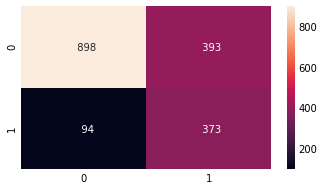

In [98]:
#Confusion Matrix

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_brf_tst),annot=True,fmt='5g')

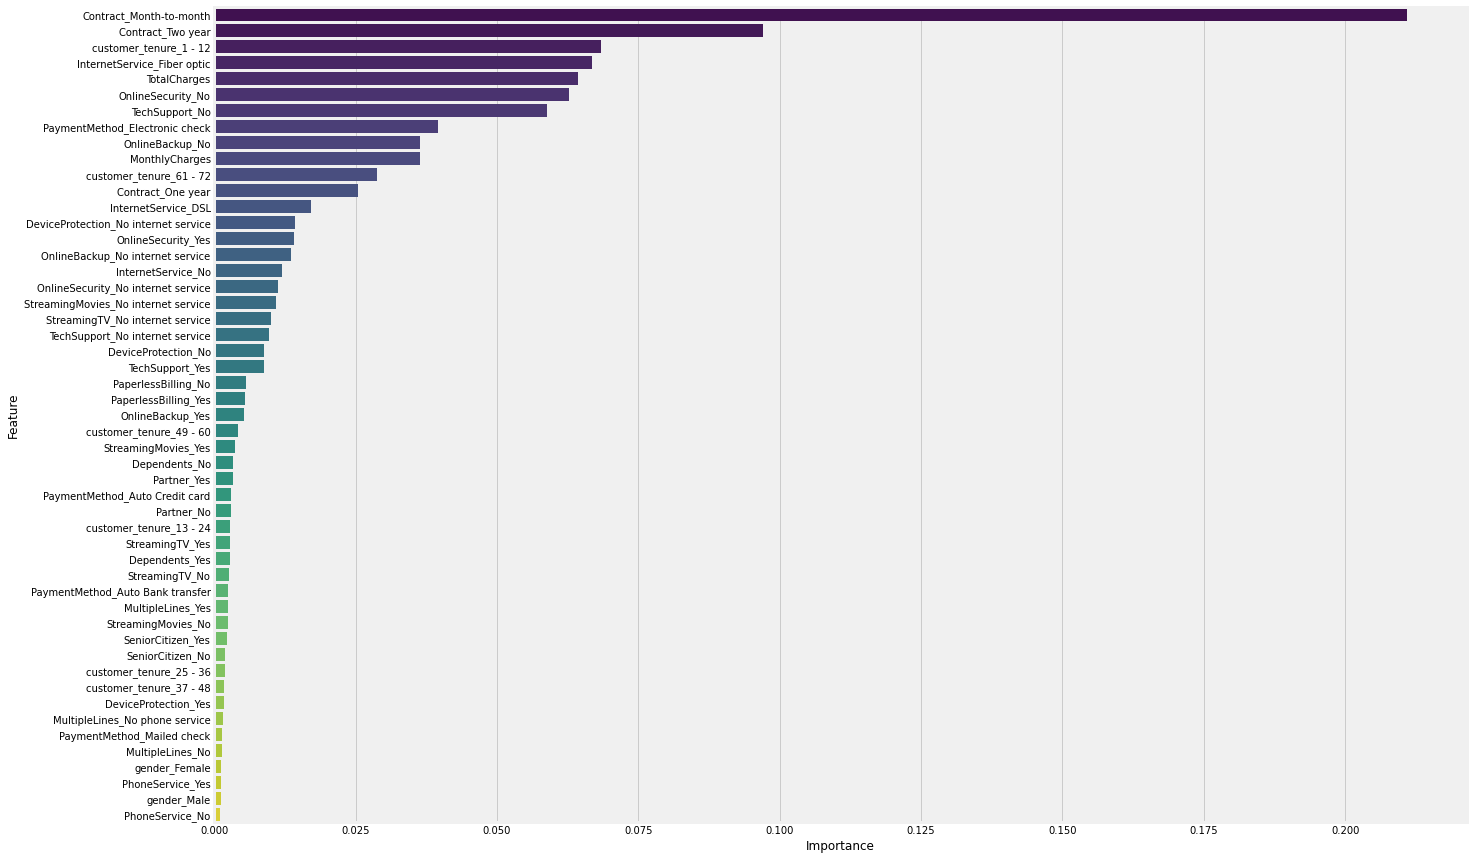

In [99]:
important_features_rf = best_brf_model.feature_importances_ #get important features

sorted_idx = np.argsort(important_features_rf)[::-1] #sort them based on scores

# Create a DataFrame for the feature importances
feature_importances_df_rf = pd.DataFrame({
    'Feature': x_train.columns[sorted_idx],
    'Importance': important_features_rf[sorted_idx]
})

plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_rf, palette='viridis'); #plot

**Feature Importance using REFCV (Recursive Feature Elimination using Cross Validation)**

Computationally very expensive

In [100]:
stratified_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42) #Define the startified cross validation

rfecv = RFECV(estimator=BalancedRandomForestClassifier(random_state=42), cv=stratified_kfold, scoring='recall') #define the model, estimator selected from above

rfecv.fit(x_train, y_train)

# Get the optimal number of features
optimal_n_features = rfecv.n_features_

selected_features = x_train.columns[rfecv.support_]

new_imp_train = x_train[selected_features]
new_imp_test  = x_test[selected_features]

print(optimal_n_features)
print(selected_features)

18
Index(['MonthlyCharges', 'TotalCharges', 'Partner_Yes', 'Dependents_Yes',
       'PaperlessBilling_Yes', 'gender_Male', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'MultipleLines_No', 'OnlineSecurity_No',
       'customer_tenure_1 - 12', 'OnlineBackup_No', 'DeviceProtection_No',
       'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_Yes'],
      dtype='object')


**Now again build the model using only the selected features and see if it is improving the performance**

In [101]:
random_search_RF = RandomizedSearchCV(estimator=brf_model, param_distributions=param_grid,n_iter = 15, cv=5, scoring='recall')

random_search_RF.fit(new_imp_train, y_train)

brf_model_imp = random_search_RF.best_estimator_

print(random_search_RF.best_params_)

brf_tst = brf_model_imp.predict(new_imp_test)

brf_trn = brf_model_imp.predict(new_imp_train)

print("**Test**")
print(classification_report(y_test,brf_tst))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train,brf_trn))

{'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': 10}
**Test**
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1291
           1       0.50      0.81      0.62       467

    accuracy                           0.73      1758
   macro avg       0.70      0.76      0.70      1758
weighted avg       0.80      0.73      0.75      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.93      0.73      0.81      3872
           1       0.53      0.84      0.65      1402

    accuracy                           0.76      5274
   macro avg       0.73      0.78      0.73      5274
weighted avg       0.82      0.76      0.77      5274



**When using selected features instead of all, just a little improvement performance, which means, the RFECV feature extraction is correct and Random Forest's native feature usage is almost similar**

Though Model performance is good in Recall, a little bit overfitting is still there

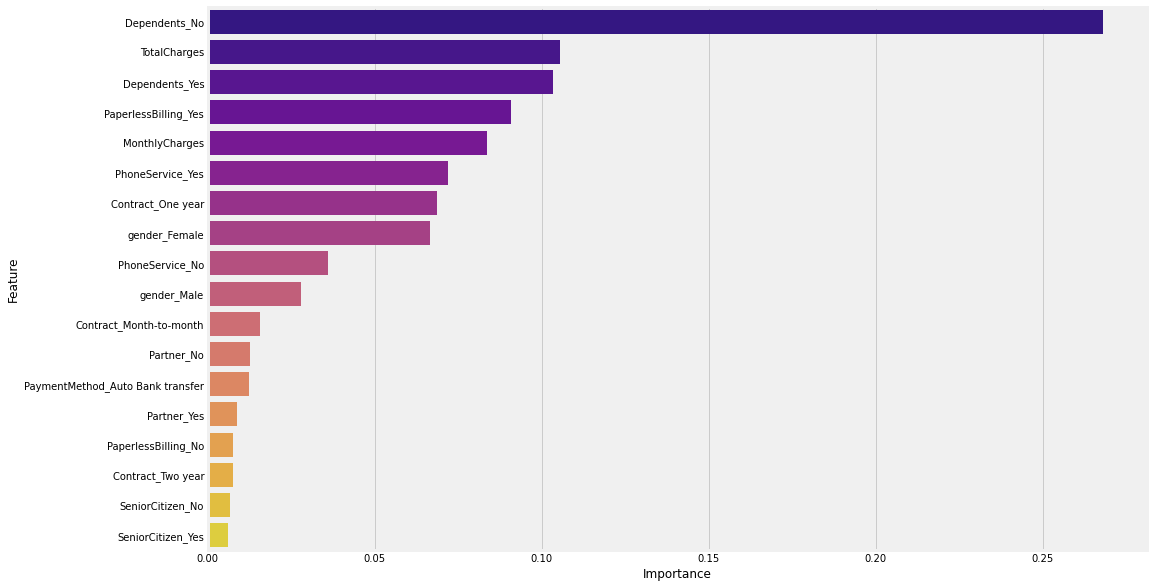

In [102]:
important_features_rf = brf_model_imp.feature_importances_

sorted_idx = np.argsort(important_features_rf)[::-1]

# Create a DataFrame for the feature importances
feature_importances_df_rf = pd.DataFrame({
    'Feature': x_train.columns[sorted_idx],
    'Importance': important_features_rf[sorted_idx]
})

plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_rf, palette='plasma');

### Logistic Regression

**Simple Logistic Regression**

In [103]:
lgr_model = LogisticRegression()

lgr_model.fit(x_train, y_train)

y_pred_lgr_test = lgr_model.predict(x_test)

print("**Test**")
print(classification_report(y_test,y_pred_lgr_test))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train,lgr_model.predict(x_train)))

**Test**
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1291
           1       0.65      0.50      0.56       467

    accuracy                           0.79      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3872
           1       0.67      0.51      0.58      1402

    accuracy                           0.80      5274
   macro avg       0.75      0.71      0.73      5274
weighted avg       0.79      0.80      0.79      5274



**No overfitting but class-1 is having very low recall rate**

**Simple Logistic Regression using SMOTE**

In [104]:
lgr_model = LogisticRegression()

lgr_model.fit(x_train_smote, y_train_smote)

y_pred_lgr_test = lgr_model.predict(x_test)

print("**Test**")
print(classification_report(y_test,y_pred_lgr_test))
print("**********************************************************************************")
print("**Train**")
print(classification_report(y_train_smote,lgr_model.predict(x_train_smote)))

**Test**
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1291
           1       0.51      0.79      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.75      1758

**********************************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      3872
           1       0.75      0.81      0.78      3872

    accuracy                           0.77      7744
   macro avg       0.77      0.77      0.77      7744
weighted avg       0.77      0.77      0.77      7744



**SMOTE improved performance for Logistic Regression (But as discussed, we need a robust model to handle class imbalance, we must not use synthetic data)**

**Hyperparameter Tuning using Grid SearchCV to check if performance is improving (scaled data)**

In [105]:
model = LogisticRegression(random_state = 27)
solvers = ['lbfgs', 'liblinear','saga','sag']
penalty = ['l1','l2'] #Regularization because we have multi-collinearity issue
c_values = [10, 1.0, 0.1, 0.01, 0.001] #Hyperparameter that controls the amount of regularization applied
class_weight = ['balanced'] #Assign higher weight to the less class, we have class imbalance issue
max_iter=[10, 20, 30] #How many times the model runs to reach the optimal solutions
# define grid search
grid = dict(solver=solvers, penalty = penalty, C = c_values, class_weight=class_weight,max_iter=max_iter)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1) #cross validations
grid_search_LG = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, refit = True,scoring='recall',error_score=0)

grid_result_scale = grid_search_LG.fit(x_train_scale, y_train)

y_pred_tst_lg = grid_search_LG.predict(x_test_scale)

y_pred_trn_lg = grid_search_LG.predict(x_train_scale)

print(grid_search_LG.best_params_)
print("**Test**")
print(classification_report(y_test,y_pred_tst_lg))
print("****************************************************************")
print("**Train**")
print(classification_report(y_train,y_pred_trn_lg))

{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}
**Test**
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1291
           1       0.48      0.80      0.60       467

    accuracy                           0.72      1758
   macro avg       0.69      0.74      0.69      1758
weighted avg       0.79      0.72      0.74      1758

****************************************************************
**Train**
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      3872
           1       0.51      0.82      0.62      1402

    accuracy                           0.74      5274
   macro avg       0.71      0.76      0.71      5274
weighted avg       0.81      0.74      0.75      5274



<AxesSubplot: >

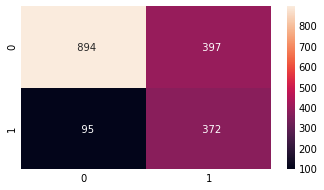

In [106]:
#Confusion Matrix

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_tst_lg),annot=True,fmt='5g')

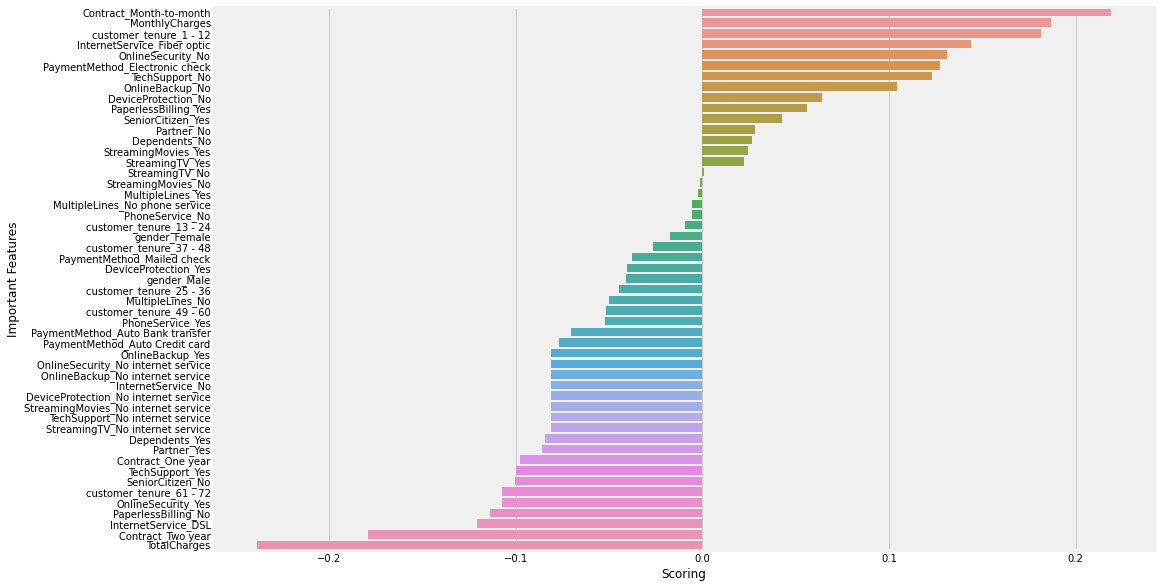

In [107]:
plt.figure(figsize=(15,10))
important_features_lg = grid_result_scale.best_estimator_.coef_[0]

feature_importance_df = pd.DataFrame({"Important Features":x_train.columns,"Scoring":important_features_lg})

feature_importance_df = feature_importance_df.sort_values(by="Scoring", ascending=False)

feature_importance_df = feature_importance_df[feature_importance_df["Scoring"] != 0.00000]

sns.barplot(feature_importance_df["Scoring"], y= feature_importance_df["Important Features"]);

In [108]:
feature_importance_df

,Important Features,Scoring
14,Contract_Month-to-month,0.219062
0,MonthlyCharges,0.186988
30,customer_tenure_1 - 12,0.181232
22,InternetService_Fiber optic,0.144038
27,OnlineSecurity_No,0.130851
19,PaymentMethod_Electronic check,0.127135
42,TechSupport_No,0.123213
36,OnlineBackup_No,0.104199
39,DeviceProtection_No,0.063879
11,PaperlessBilling_Yes,0.055829


### Model Stacking


base_model_1 = DecisionTreeClassifier()

base_model_2 = BalancedRandomForestClassifier()

base_model_3=  XGBoost()

meta_model = LogisticRegression()

1. Build all the 3 base models one by one on the training data and then predict on the validation data
2. Combine validation predictions from all the 3 above base model and store each as columns. 
3. Fit the meta model on the above combination (prediction) and target value
4. Then make prediction on the test data
5. First predict test data using all above base models, then store the predictions, then meta model will predict this prediction

This is a type of Ensemble method where we are stacking different combinations and then another model is learning their patterns from the predictions made by them

build tain, test and validation data

In [109]:
x_train_stack, x_test_stack, y_train_stack, y_test_stack = train_test_split(X, y, test_size=.20, random_state=1, stratify=y) 

In [110]:
x_train_stack, x_val_stack, y_train_stack, y_val_stack = train_test_split(x_train_stack, y_train_stack, test_size=.20, random_state=1, stratify=y_train_stack)

In [111]:
transformed = transformer.fit_transform(x_train_stack)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.index = x_train_stack.index
x_train_stack = pd.concat([x_train_stack, transformed_df], axis=1)
x_train_stack.drop(cate, axis=1, inplace=True)

transformed = transformer.transform(x_test_stack)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.index = x_test_stack.index
x_test_stack = pd.concat([x_test_stack, transformed_df], axis=1)
x_test_stack.drop(cate, axis=1, inplace=True)

transformed = transformer.transform(x_val_stack)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.index = x_val_stack.index
x_val_stack = pd.concat([x_val_stack, transformed_df], axis=1)
x_val_stack.drop(cate, axis=1, inplace=True)

**Base Model Building**

In [112]:
DT = DecisionTreeClassifier(random_state=1,criterion= 'gini', max_depth = 10,max_features ='log2', min_samples_leaf= 10, min_samples_split= 4)
DT.fit(x_train_stack, y_train_stack)
print("Decision Tree fit is completed")


XG = xgb.XGBClassifier(random_state=1,colsample_bytree= 0.9, gamma= 0.0, learning_rate= 0.001, max_delta_step= 1, max_depth= 4, min_child_weight= 4, n_estimators= 1000, nthread= 4, objective= 'binary:logistic', scale_pos_weight= 2.7, subsample= 0.9)
XG.fit(x_train_stack, y_train_stack)
print("XGBoost fit is completed")

BRF = BalancedRandomForestClassifier(random_state=1, n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 2, max_features= 'log2', max_depth= 10)
BRF.fit(x_train_stack, y_train_stack)
print("Balanced Random Forest fit is completed")

Decision Tree fit is completed
XGBoost fit is completed
Balanced Random Forest fit is completed


In [113]:
# make prediction on the validation data

dt_pred= DT.predict(x_val_stack)

rf_pred = BRF.predict(x_val_stack)

xgb_pred = XG.predict(x_val_stack)

In [114]:
# Store all the predictions in each column and combine them

x_stack_meta = np.column_stack((dt_pred,rf_pred,xgb_pred))

x_stack_meta.shape

(1125, 3)

In [115]:
grid_search_LG = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, refit = True,scoring='recall',error_score=0)
# Similar Linear Regression as done before

In [116]:
grid_search_LG.fit(x_stack_meta, y_val_stack) #fit the model on predictions from the base models

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(random_state=27),
             n_jobs=-1,
             param_grid={'C': [10, 1.0, 0.1, 0.01, 0.001],
                         'class_weight': ['balanced'], 'max_iter': [10, 20, 30],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'sag']},
             scoring='recall')

In [117]:
y_val_stack_pred = grid_search_LG.predict(x_stack_meta) #what ever pattern it has learned from the precictions, now it will try to predict the same

In [118]:
# Make Prediction on the new data

dt_pred_new = DT.predict(x_test_stack)

rf_pred_new = BRF.predict(x_test_stack)

xgb_pred_new = XG.predict(x_test_stack)

x_new_meta = np.column_stack((dt_pred_new,rf_pred_new, xgb_pred_new))

y_new_stack_pred = grid_search_LG.predict(x_new_meta)

In [119]:
print("Test")
print(classification_report(y_test_stack,y_new_stack_pred))
print("*********************************************************************")
print(classification_report(y_val_stack,y_val_stack_pred))

Test
              precision    recall  f1-score   support

           0       0.92      0.64      0.76      1033
           1       0.46      0.84      0.60       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.80      0.70      0.71      1407

*********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       826
           1       0.49      0.86      0.62       299

    accuracy                           0.72      1125
   macro avg       0.71      0.77      0.70      1125
weighted avg       0.81      0.72      0.74      1125



In [120]:
# Check which base model has highest contributions to the prediction and later check that base model's feature importance
meta_model_coefficients = grid_search_LG.best_estimator_.coef_[0]

meta_model_coefficients

array([0.09058154, 0.11285132, 0.11672563])

**The last coefficient is for XGboost, which is the highest contributor**

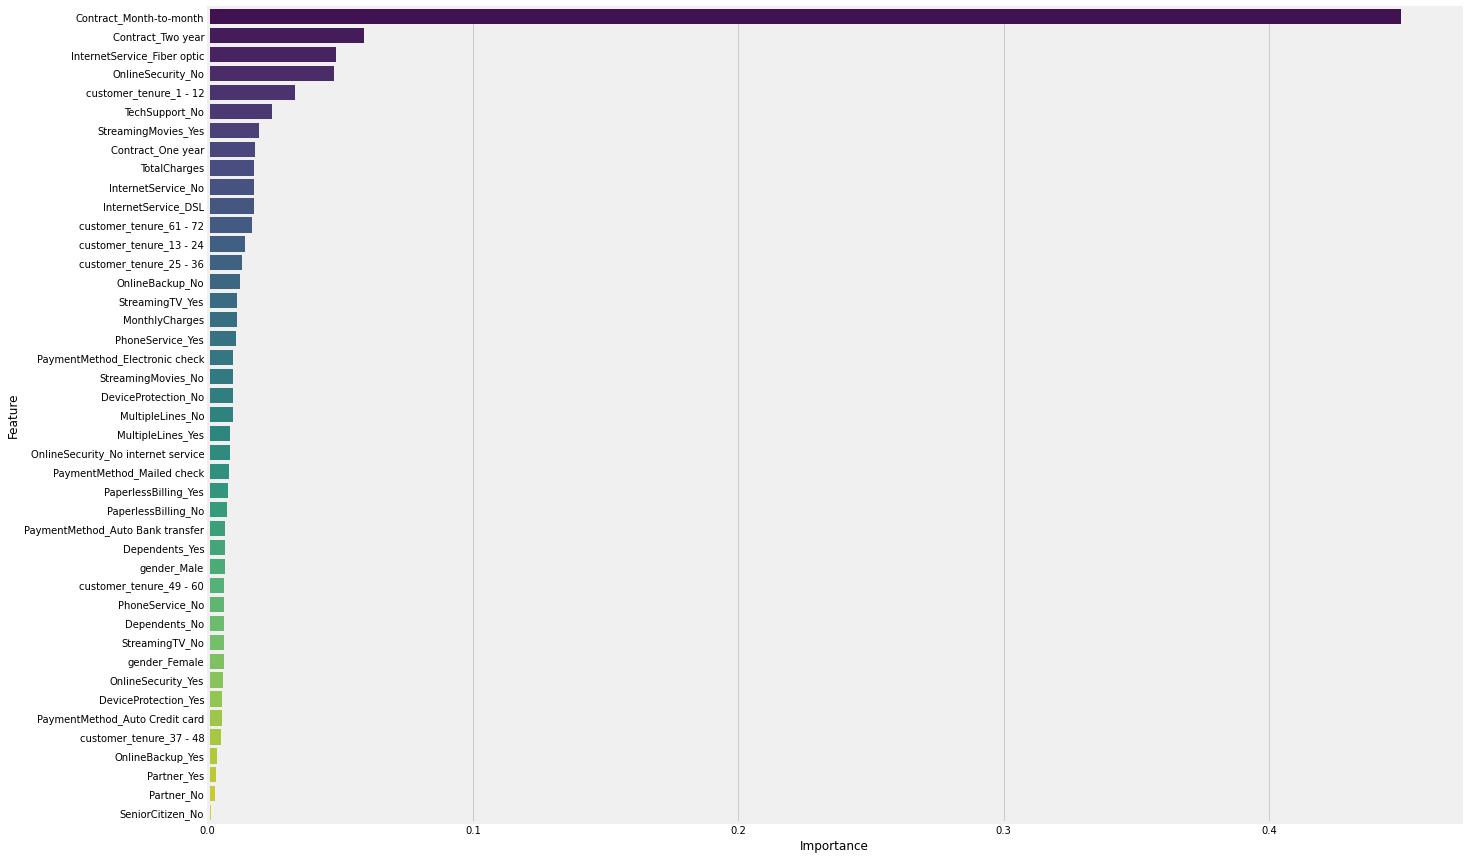

In [121]:
important_features_xgb = XG.feature_importances_ #get important features from the base model which we built

sorted_idx = np.argsort(important_features_xgb)[::-1] #sort them based on scores

# Create a DataFrame for the feature importances
feature_importances_df_xgb = pd.DataFrame({
    'Feature': x_train.columns[sorted_idx],
    'Importance': important_features_xgb[sorted_idx]
})
feature_importances_df_xgb = feature_importances_df_xgb[feature_importances_df_xgb.index.isin(feature_importances_df_xgb.index[:43])] #Select only required cols
plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_xgb, palette='viridis'); #plot

# Clustering for Customer Segmentation

In [122]:
# Cleansed and encoded data
df_concat = pd.concat([x_train, x_test])
y_concat =  pd.concat([y_train, y_test])

df_concat.insert(0, "Churn",y_concat)

In [123]:
df_concat.shape

(7032, 52)

<AxesSubplot: ylabel='Density'>

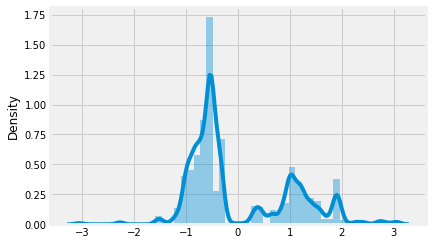

In [124]:
df_scaled= df_concat.apply(zscore) #Scalling required for K-Means
sns.distplot(df_scaled)

### K-Means Clustering

Text(0.5, 1.0, 'Elbow Curve')

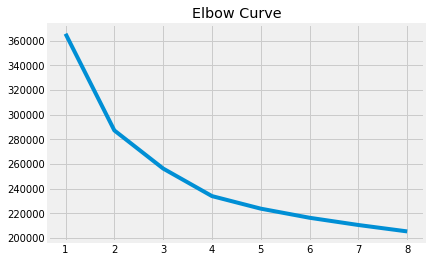

In [125]:
# Finding the optimal clusters
wss = []

for i in range(1,9):
    KM= KMeans(n_clusters = i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_) #Intertia: sum of squared distances of samples to their closest cluster center
plt.plot(range(1,9), wss)
plt.title('Elbow Curve')

**We see a high break at 2 and after that s slight break point at 4, after that no break and a smooth line, so 4 is our no of clusters**

In [126]:
k_means = KMeans(n_clusters = 4, random_state=42) #defining the model with 4 clusters derived from above
k_means.fit(df_scaled) #fit the entire data
labels = k_means.labels_ #Extract cluster names

K_cluster = df_concat.copy()
K_cluster['Customer_Segmentation_Group'] = labels

K_cluster.head()

,Churn,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Customer_Segmentation_Group
1241,0,64.50,1888.45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
1301,0,58.20,3810.80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1604,0,95.75,6511.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
934,0,33.60,435.45,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2
621,0,92.05,5755.80,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


**Check Cluster Distributions**

<AxesSubplot: xlabel='Customer_Segmentation_Group', ylabel='count'>

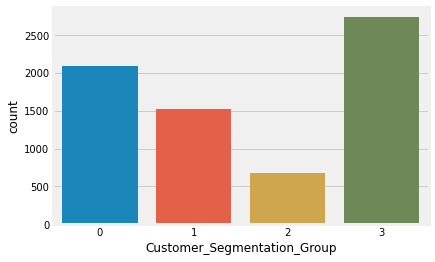

In [127]:
sns.countplot(K_cluster["Customer_Segmentation_Group"])

<AxesSubplot: xlabel='Customer_Segmentation_Group', ylabel='count'>

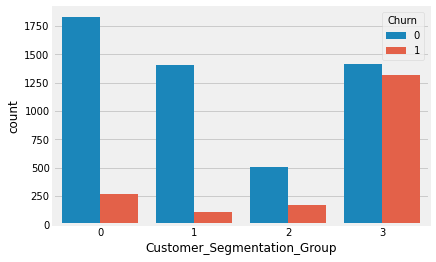

In [128]:
sns.countplot(K_cluster['Customer_Segmentation_Group'], hue=K_cluster['Churn'])

### Clustering Analysis

**Check average of each data point in each cluster**

In [129]:
#Group by cluster group and calculate the mean
K_mean_cluster = pd.DataFrame(round(K_cluster.groupby('Customer_Segmentation_Group').mean(),1)) 
pd.set_option('display.max_columns',None) #Show all the columns which are hiding by the dataframe due to high volume of features
pd.set_option('display.expand_frame_repr',False)
def format_func(value):
    return f"{value:.2f}"
K_mean_cluster_st = K_mean_cluster.style.background_gradient(cmap='Set2').format(format_func)

K_mean_cluster_st

,Churn,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Auto Bank transfer,PaymentMethod_Auto Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,customer_tenure_1 - 12,customer_tenure_13 - 24,customer_tenure_25 - 36,customer_tenure_37 - 48,customer_tenure_49 - 60,customer_tenure_61 - 72,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
Customer_Segmentation_Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.10,91.10,5069.80,0.80,0.20,0.30,0.70,0.60,0.40,0.00,1.00,0.30,0.70,0.50,0.50,0.20,0.40,0.40,0.30,0.30,0.30,0.10,0.40,0.60,0.00,0.30,0.00,0.70,0.40,0.00,0.60,0.00,0.00,0.10,0.20,0.20,0.50,0.30,0.00,0.70,0.30,0.00,0.70,0.40,0.00,0.60,0.30,0.00,0.70,0.30,0.00,0.70
1,0.10,21.10,665.20,1.00,0.00,0.50,0.50,0.60,0.40,0.00,1.00,0.70,0.30,0.50,0.50,0.30,0.20,0.40,0.20,0.20,0.10,0.50,0.00,0.00,1.00,0.80,0.00,0.20,0.00,1.00,0.00,0.30,0.20,0.10,0.10,0.10,0.20,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2,0.20,42.00,1500.40,0.80,0.20,0.50,0.50,0.70,0.30,1.00,0.00,0.40,0.60,0.50,0.50,0.60,0.20,0.20,0.20,0.20,0.30,0.20,1.00,0.00,0.00,0.00,1.00,0.00,0.60,0.00,0.40,0.30,0.10,0.10,0.10,0.10,0.20,0.60,0.00,0.40,0.60,0.00,0.40,0.60,0.00,0.40,0.60,0.00,0.40,0.60,0.00,0.40
3,0.50,74.70,1246.30,0.80,0.20,0.70,0.30,0.80,0.20,0.00,1.00,0.30,0.70,0.50,0.50,0.90,0.10,0.00,0.10,0.10,0.50,0.20,0.30,0.70,0.00,0.60,0.00,0.40,0.80,0.00,0.20,0.50,0.20,0.10,0.10,0.00,0.00,0.70,0.00,0.30,0.80,0.00,0.20,0.80,0.00,0.20,0.70,0.00,0.30,0.70,0.00,0.30


**Cluster-0 Analysis**

In [130]:
cluster_0 = K_mean_cluster[K_mean_cluster.index == 0] #creating cluster-0 dataframe

cluster_0.loc[:, (cluster_0 >= 0.50).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)
#Checking average values >50%, these are the highest utilised features

Customer_Segmentation_Group,0
MonthlyCharges,91.10
TotalCharges,5069.80
SeniorCitizen_No,0.80
Partner_Yes,0.70
Dependents_No,0.60
PhoneService_Yes,1.00
PaperlessBilling_Yes,0.70
gender_Female,0.50
gender_Male,0.50
InternetService_Fiber optic,0.60


In [131]:
cluster_0 = K_mean_cluster[K_mean_cluster.index == 0]

cluster_0.loc[:, (cluster_0 == 0.00).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)
#Checking average values == 0, these are the lowest/NO utilised values

Customer_Segmentation_Group,0
PhoneService_No,0.00
InternetService_No,0.00
MultipleLines_No phone service,0.00
OnlineSecurity_No internet service,0.00
customer_tenure_1 - 12,0.00
customer_tenure_13 - 24,0.00
OnlineBackup_No internet service,0.00
DeviceProtection_No internet service,0.00
TechSupport_No internet service,0.00
StreamingTV_No internet service,0.00


**Cluster-1 Analysis**

In [132]:
cluster_1 = K_mean_cluster[K_mean_cluster.index == 1]

cluster_1.loc[:, (cluster_1 >= 0.50).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)

Customer_Segmentation_Group,1
MonthlyCharges,21.10
TotalCharges,665.20
SeniorCitizen_No,1.00
Partner_No,0.50
Partner_Yes,0.50
Dependents_No,0.60
PhoneService_Yes,1.00
PaperlessBilling_No,0.70
gender_Female,0.50
gender_Male,0.50


In [133]:
cluster_1.loc[:, (cluster_1 == 0.00).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)

Customer_Segmentation_Group,1
SeniorCitizen_Yes,0.00
PhoneService_No,0.00
InternetService_DSL,0.00
InternetService_Fiber optic,0.00
MultipleLines_No phone service,0.00
OnlineSecurity_No,0.00
OnlineSecurity_Yes,0.00
OnlineBackup_No,0.00
OnlineBackup_Yes,0.00
DeviceProtection_No,0.00


**Cluster-2 Analysis**

In [134]:
cluster_2 = K_mean_cluster[K_mean_cluster.index == 2]

cluster_2.loc[:, (cluster_2 >= 0.50).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)

Customer_Segmentation_Group,2
MonthlyCharges,42.00
TotalCharges,1500.40
SeniorCitizen_No,0.80
Partner_No,0.50
Partner_Yes,0.50
Dependents_No,0.70
PhoneService_No,1.00
PaperlessBilling_Yes,0.60
gender_Female,0.50
gender_Male,0.50


In [135]:
cluster_2.loc[:, (cluster_2 == 0.0).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)

Customer_Segmentation_Group,2
PhoneService_Yes,0.00
InternetService_Fiber optic,0.00
InternetService_No,0.00
MultipleLines_No,0.00
MultipleLines_Yes,0.00
OnlineSecurity_No internet service,0.00
OnlineBackup_No internet service,0.00
DeviceProtection_No internet service,0.00
TechSupport_No internet service,0.00
StreamingTV_No internet service,0.00


**Cluster-3 Analysis**

In [136]:
cluster_3 = K_mean_cluster[K_mean_cluster.index == 3]

cluster_3.loc[:, (cluster_3 >= 0.50).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)

Customer_Segmentation_Group,3
Churn,0.50
MonthlyCharges,74.70
TotalCharges,1246.30
SeniorCitizen_No,0.80
Partner_No,0.70
Dependents_No,0.80
PhoneService_Yes,1.00
PaperlessBilling_Yes,0.70
gender_Female,0.50
gender_Male,0.50


In [137]:
cluster_3.loc[:,(cluster_3 == 0.0).any(axis=0)].T.style.background_gradient(cmap='Set2').format(format_func)


Customer_Segmentation_Group,3
PhoneService_No,0.00
Contract_Two year,0.00
InternetService_No,0.00
MultipleLines_No phone service,0.00
OnlineSecurity_No internet service,0.00
customer_tenure_49 - 60,0.00
customer_tenure_61 - 72,0.00
OnlineBackup_No internet service,0.00
DeviceProtection_No internet service,0.00
TechSupport_No internet service,0.00


### Combining outputs 

Below values are manually taken from Test classification report for class-1 (Churned) having prediction metrics

All classification reports are showed under each model's code

In [139]:
test_scores=[0.74,0.78,0.77,0.77,0.73,0.73,0.74,0.72,0.72,0.73,0.79,0.74,0.72,0.70]
recall_test=[0.51,0.62,0.55,0.58,0.82,0.82,0.81,0.79,0.80,0.81,0.50,0.79,0.80,0.84]
precision_test = [0.50,0.43,0.60,0.49,0.49,0.49,0.50,0.49,0.49,0.50,0.65,0.51,0.48,0.46]
f1score_test=[0.50,0.51,0.58,0.54,0.62,0.62,0.62,0.60,0.61,0.62,0.56,0.62,0.60,0.60]

performance_comp=(pd.DataFrame({'Pred_Accuracy': test_scores,'Pred_Recall': recall_test,'Pred_precision': precision_test,'Pred_F1': f1score_test},
            index=['DecisionTree','DecisionTree-GridCV','DecisionTree-SMOTE','XGBoost','XGBoost-GridCV','XGBoost-GridCV-Imp-Features','XGBoost-RandomCV','BalancedRandomForest','BalancedRandomForest-GridCV','BalancedRandomForest-GridCV_Imp-Features','LogisticRegression','LogisticRegression-SMOTE','LogisticRegression-StandardScaler','Model-Stacking']))


# Define a formatting function to ensure the numbers display correctly
def format_func(value):
    return f"{value:.2f}"

# Apply background gradient to the DataFrame and custom format function
styled_df = performance_comp.style.background_gradient(cmap='Pastel2_r').format(format_func)


styled_df

,Pred_Accuracy,Pred_Recall,Pred_precision,Pred_F1
DecisionTree,0.74,0.51,0.50,0.50
DecisionTree-GridCV,0.78,0.62,0.43,0.51
DecisionTree-SMOTE,0.77,0.55,0.60,0.58
XGBoost,0.77,0.58,0.49,0.54
XGBoost-GridCV,0.73,0.82,0.49,0.62
XGBoost-GridCV-Imp-Features,0.73,0.82,0.49,0.62
XGBoost-RandomCV,0.74,0.81,0.50,0.62
BalancedRandomForest,0.72,0.79,0.49,0.60
BalancedRandomForest-GridCV,0.72,0.80,0.49,0.61
BalancedRandomForest-GridCV_Imp-Features,0.73,0.81,0.50,0.62


# Model Summary

This project combined rigorous data analysis, cleaning, transformations, model building, and evaluations. By considering the data assumptions, I have chosen a Tree-based model (Decision Tree), an Ensemble model (Random Forest), extreme Gradient boosting (XGBoost), and model stacking (Combining all). The reason behind model stacking is, in many cases, this ensemble method where we combine all the models gives accurate results as it learns the patterns very well. I started with building the basic model of each algorithm, evaluated how it performed, and based on that performance, I slowly moved to Hyperparameter tuning such as Grid Search and randomized search with either simple cross-validation or stratified cross-validations or repeated stratified cross-validations with experimentation of different parameters. While improving the accuracy of each model, I also tried to reduce overfitting using the above-mentioned searches and CV. Due to multi-collinearity, tree based models like Random Forest or XGBoost do not find accurate feature importance, though there is no impact on prediction. Therefore, I have used RFE (Recursive feature Elimination technique) to find best features from them. There is a class imbalance issue which is a curse for any ML prediction, therefore instead of using Synthetic data, I tried to build robust models utilizing properties that handle imbalances, one such example is class weight. Finally, I evaluated the metrics (Recall and F1 Score), by giving more importance to Recall, as I don't want my model to mark churned customers as non-churned(it's a nightmare in any retention project). I also extracted feature importances derived from each model. XGBoost has 82% Recall in the test, Logistic regression has 80%, Random Forest has 81%, and Stacking model has 84%. In any churning project, model interpretation (feature-importance for correct churning drivers) is equally important like model prediction. So by looking into both, I feel Logistic Regression is outstanding in both, even though recall is a little less compared to others. Therefore, in the future, my focus will be on improving the recall value and balance performance in Logistic Regression. At last, I tried to build Clustering to make segmentations of customers which gave me greater knowledge of finding risky customers and their behaviour.